In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import numpy as np
import graphviz


#Scale 변환: 평균, 표준편차, 기준

from sklearn.preprocessing import StandardScaler

#주성분 분석
from sklearn.decomposition import PCA

#회귀분석
from statsmodels.formula.api import ols
#qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
#선형 모델 formula(y~X1+X2+...)

import statsmodels.formula.api as smf
#평가함수
from statsmodels.tools.eval_measures import rmse
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier as GBC
import seaborn as sns
# 주피터 사용시 그래프자동출력 옵션
matplotlib.rc('font', family ='Malgun Gothic')

import statsmodels.formula.api as smf # 선형모델 formula(y ~ x1 +x2+ x3)
import statsmodels.api as sm
# ols Ordinary Least Squares (최소자승법 라이브러리)
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


from statsmodels.api import Logit

from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
# 한글 맑은 고딕 적용
matplotlib.rc('font',family='NanumGothic')

# matplotlib  패키지 한글 깨짐 처리
# 한글 폰트(맑은 고딕) 적용 : 윈도우, 구글 콜랩
matplotlib.rc('font',family='NanumGothic')
plt.rc('font',family='NanumGothic')

# seaborn에서 한글 깨짐 해결:unicode minus 사용 않기 위한 설정(minus 깨짐 현상 방지)
plt.rcParams['axes.unicode_minus']=False



#  Step1. 데이터 불러오기


In [2]:
df_raw= pd.read_csv('/home/piai/test/test2/currentwork/SCALE불량.csv', engine= 'python', encoding ='cp949')
df_raw.drop("PLATE_NO", axis = 1, inplace = True)
df_raw.drop("ROLLING_DATE", axis = 1, inplace = True)
df_raw.drop("SPEC", axis = 1, inplace = True)
#목표 변수와 전혀관계 없는  명목척도 제외 후 df_raw에 그대로 저장
df_raw['SCALE'] = df_raw['SCALE'].map(lambda x : 0 if x == "양품" else 1)
# 정수로 표현된 범주형 변수 object로 변환
df_raw= df_raw.astype({'FUR_NO_ROW' : 'object'}) 




df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SCALE              720 non-null    int64  
 1   STEEL_KIND         720 non-null    object 
 2   PT_THK             720 non-null    float64
 3   PT_WDTH            720 non-null    int64  
 4   PT_LTH             720 non-null    int64  
 5   PT_WGT             720 non-null    int64  
 6   FUR_NO             720 non-null    object 
 7   FUR_NO_ROW         720 non-null    object 
 8   FUR_HZ_TEMP        720 non-null    int64  
 9   FUR_HZ_TIME        720 non-null    int64  
 10  FUR_SZ_TEMP        720 non-null    int64  
 11  FUR_SZ_TIME        720 non-null    int64  
 12  FUR_TIME           720 non-null    int64  
 13  FUR_EXTEMP         720 non-null    int64  
 14  ROLLING_TEMP_T5    720 non-null    int64  
 15  HSB                720 non-null    object 
 16  ROLLING_DESCALING  720 non

#  Step2. 데이터 정제 

In [3]:
df_raw.describe().round(3)

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
count,720.000,720.000,720.000,720.000,720.000,720.000,720.000,720.000,720.000,720.000,720.000,720.000,720.000
mean,0.321,29.268,2807.128,34323.269,41481.778,1155.339,88.528,1149.667,78.803,300.564,1149.667,933.921,8.319
std,0.467,19.153,517.840,13828.435,24751.322,20.866,37.661,17.572,36.421,45.390,17.572,107.864,1.623
min,0.000,12.030,1800.000,7893.000,7820.000,1103.000,43.000,1113.000,35.000,221.000,1113.000,0.000,5.000
25%,0.000,16.090,2466.000,22663.000,17757.500,1139.000,65.000,1132.000,57.750,257.000,1132.000,889.750,6.000
50%,0.000,20.130,2725.000,37380.000,36120.000,1158.000,75.000,1155.000,67.500,304.000,1155.000,951.000,8.000
75%,1.000,40.000,3125.000,43735.000,61120.000,1171.000,101.000,1164.000,86.000,342.000,1164.000,994.250,10.000
max,1.000,100.340,4575.000,54917.000,115080.000,1206.000,312.000,1185.000,294.000,398.000,1185.000,1078.000,10.000


## Step2-1 결측치 확인

In [4]:
# 결측치를 확인한다.
# 결측치는 없다.
df_raw.isna().sum()


SCALE                0
STEEL_KIND           0
PT_THK               0
PT_WDTH              0
PT_LTH               0
PT_WGT               0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

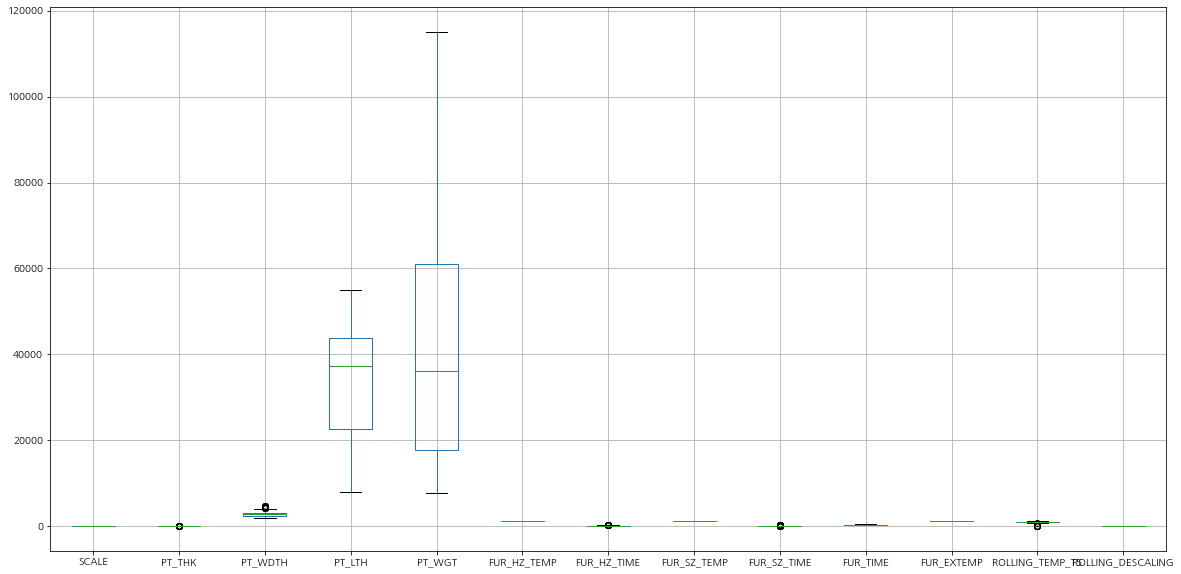

In [5]:
df_raw.boxplot(figsize =(20,10))



###연속형 변수 13개의 분포 및 이상치를 확인하기 위해  박스플롯을 그려보았다.
그려본 결과 PT_THICK,PT_WIDTH,FUR_HZ_TIME,FUR_SZ_TIME,ROLLING_TEMP_T5 총 5개 변수에서 이상치를 발견하였다. 이상치는 SCALE과의 영향을 분석하는 과정에서 다른 결과를 나타낼 수있기 때문에 제거하거나 대체값을 지정해주어야한다.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fedcd307400>],
      dtype=object)

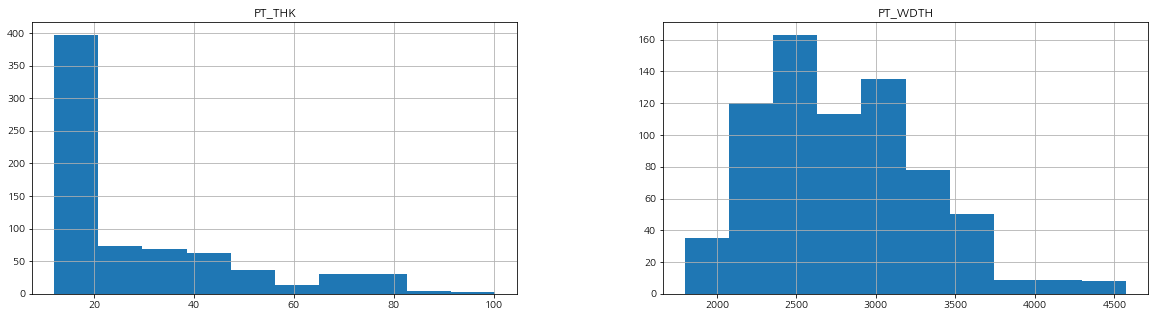

In [6]:
df_strange1= df_raw[['PT_THK']]
df_strange2= df_raw[['PT_WDTH']]
df_strange3= df_raw[['FUR_HZ_TIME']]
df_strange4= df_raw[['FUR_SZ_TIME']]
df_strange5= df_raw[['ROLLING_TEMP_T5']]

fig, ax =plt.subplots(nrows= 1, ncols =2, figsize = (20, 5))
df_strange1.hist(figsize =(10,5), ax = ax[0])

df_strange2.hist(figsize =(10,5), ax = ax[1])


설명 변수 PT_THICK, PT_WIDTH, FUR_HZ_TIME, FUR_SZ_TIME, ROLLING_TEMP_T5의 이상치를 상세히 확인하기 
위해 그려보았다. 상세하게 보니 PT_THICK는 편향된 분포를 보이긴 하지만, 이상치로 보이는 값은 없다.
PT_WIDTH도 이상치로 보이는 값은 없다.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fedc7d0d340>],
      dtype=object)

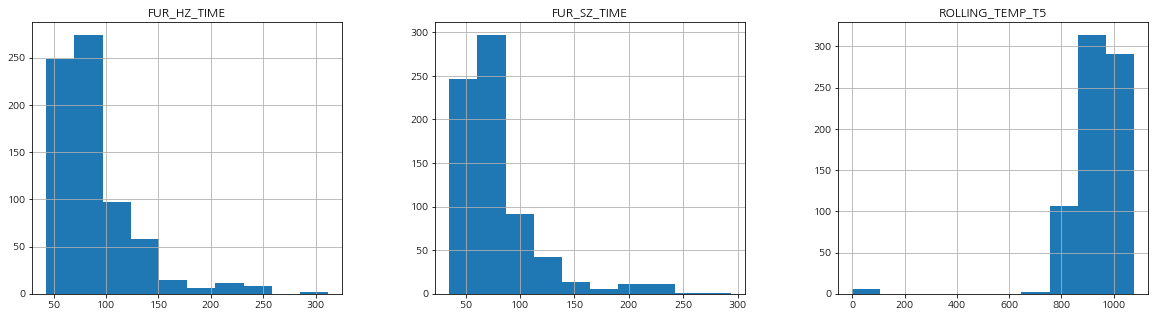

In [109]:

fig, ax =plt.subplots(nrows= 1, ncols =3, figsize = (20, 5))

df_strange3.hist(figsize =(10,5), ax = ax[0])
df_strange4.hist(figsize =(10,5), ax = ax[1])
df_strange5.hist(figsize =(10,5), ax = ax[2])


FUR_HZ_TIME변수는 250인 연결이 안되고 좀 동떨어진 곳에 관측치가 존재하지만, 큰차이가 시간차이가 심하게 나는 이상치로 보기어렵다. 
FUR_SZ_TIME변수에서는 이상치를 볼 수 없다.
ROLLING_TEMP_T5는 600 미만의 값이 존재한다. 
해당변수는 압연 온도를 나타내는 변수인데, 압연이 상온에서 진행되는 것은 있을 수 없는 일이므로 이 값들은 이상치라고
볼수있다.


# ROLLING_TEMP_T5변수 이상치 처리

In [8]:
df_raw[df_raw['ROLLING_TEMP_T5']<= 600]

,SCALE,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
41,0,T8,55.51,3765,11398,37400,3호기,2,1132,95,1128,80,341,1128,0,적용,6,1조
184,0,C0,16.09,2221,43596,61150,3호기,1,1169,64,1164,61,308,1164,0,적용,10,3조
185,0,C0,16.09,2221,43596,61150,3호기,2,1163,57,1166,67,303,1166,0,적용,10,4조
494,0,T5,80.82,2085,12919,17090,2호기,1,1133,89,1122,59,378,1122,0,적용,6,2조
495,0,T5,80.82,2085,13176,17430,1호기,2,1130,92,1124,61,362,1124,0,적용,6,3조
496,0,T0,40.35,2497,23592,37320,3호기,1,1119,109,1117,76,383,1117,0,적용,6,3조


이상치를 처리하기 전에 해당 값을 출력해보았다.
처음에는 이상치를 ROLLING_TEMP_T5의 평균으로 대체할까 생각도 했지만, 
이상치를 출력해보니 이상치 의 강종이 CO, T0, T5, T8으로 서로 달랐기때문에 이 방법은 어려웠다.
데이터수가 6개로 삭제해도 영향이 크지 않을 것이라 판단하고, 삭제하겠다.

In [9]:
df_raw = df_raw[df_raw['ROLLING_TEMP_T5']>= 600]


# fig, ax =plt.subplots(nrows= 1, ncols =2, figsize = (20, 5))
# df_raw[['ROLLING_TEMP_T5']].boxplot(figsize =(20,10),ax = ax[0])
# df_raw[['ROLLING_TEMP_T5']].hist(figsize =(20,10), ax = ax[1])


In [10]:
df_raw

,SCALE,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,0,T1,32.25,3707,15109,14180,1호기,1,1144,116,1133,59,282,1133,934,적용,8,2조
1,0,T1,32.25,3707,15109,14180,1호기,2,1144,122,1135,53,283,1135,937,적용,8,2조
2,0,T8,33.27,3619,19181,18130,2호기,1,1129,116,1121,55,282,1121,889,적용,8,3조
3,0,T8,33.27,3619,19181,18130,2호기,2,1152,125,1127,68,316,1127,885,적용,8,3조
4,0,T8,38.33,3098,13334,12430,3호기,1,1140,134,1128,48,314,1128,873,적용,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,1,C0,20.14,3580,38639,21870,3호기,1,1172,72,1164,62,245,1164,1005,적용,8,2조
716,0,C0,15.08,3212,48233,18340,2호기,1,1150,61,1169,61,238,1169,947,적용,10,1조
717,0,C0,16.60,3441,43688,19590,2호기,2,1169,65,1163,77,247,1163,948,적용,10,4조
718,0,C0,15.59,3363,48740,80240,3호기,2,1179,86,1163,45,243,1163,940,적용,10,2조


In [11]:
df_raw[df_raw['ROLLING_TEMP_T5']<= 600]

,SCALE,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fedcd11eb80>],
      dtype=object)

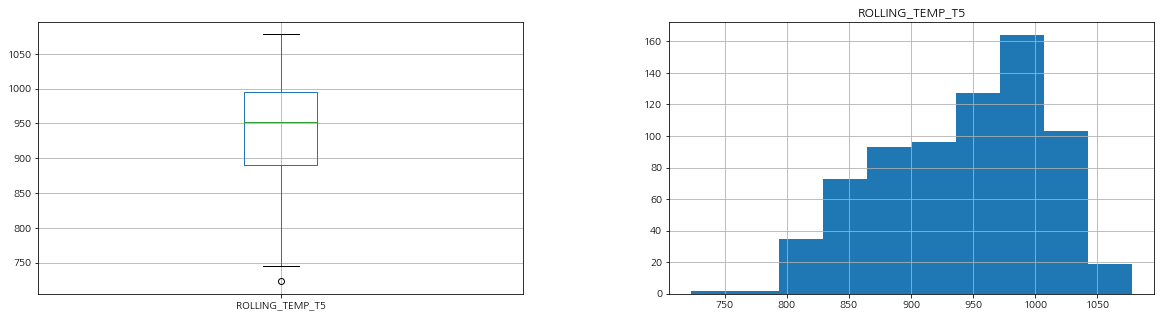

In [12]:
fig, ax =plt.subplots(nrows= 1, ncols =2, figsize = (20, 5))
df_raw[['ROLLING_TEMP_T5']].boxplot(figsize =(20,10),ax = ax[0])
df_raw[['ROLLING_TEMP_T5']].hist(figsize =(20,10), ax = ax[1])

이상치를 제거한 후 박스플롯과 히스토그램이다.
박스플롯을 보면 이상치 처럼 보이는 값이 하나 있는데 이는 특정 강종의 수가 대다수 인 해당되는 데이터 중에서
소수의 강종 데이터가 이상치로 표현 될 수있기때문에 이상치라고 볼수없다.

In [13]:
df_raw_numeric = df_raw.select_dtypes(exclude = 'object')
df_raw_numeric.head()
df_raw_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 719
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SCALE              714 non-null    int64  
 1   PT_THK             714 non-null    float64
 2   PT_WDTH            714 non-null    int64  
 3   PT_LTH             714 non-null    int64  
 4   PT_WGT             714 non-null    int64  
 5   FUR_HZ_TEMP        714 non-null    int64  
 6   FUR_HZ_TIME        714 non-null    int64  
 7   FUR_SZ_TEMP        714 non-null    int64  
 8   FUR_SZ_TIME        714 non-null    int64  
 9   FUR_TIME           714 non-null    int64  
 10  FUR_EXTEMP         714 non-null    int64  
 11  ROLLING_TEMP_T5    714 non-null    int64  
 12  ROLLING_DESCALING  714 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 78.1 KB


In [14]:
df_raw_numeric_x = df_raw_numeric
df_raw_numeric_y = df_raw["SCALE"]
df_raw_numeric_x.head()

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
0,0,32.25,3707,15109,14180,1144,116,1133,59,282,1133,934,8
1,0,32.25,3707,15109,14180,1144,122,1135,53,283,1135,937,8
2,0,33.27,3619,19181,18130,1129,116,1121,55,282,1121,889,8
3,0,33.27,3619,19181,18130,1152,125,1127,68,316,1127,885,8
4,0,38.33,3098,13334,12430,1140,134,1128,48,314,1128,873,8


# 연속형 변수 탐색적 분석(EDA)

#### 목표 변수 SCALE에 대한 PT_THK와 STEEL_KIND 변수의 영향 확인

In [15]:
#가장 먼저 PT_THK의 기술통계량을 확인하였다. 
df_raw['PT_THK'].describe()

count    714.000000
mean      29.108091
std       18.994878
min       12.030000
25%       16.090000
50%       20.130000
75%       38.430000
max      100.340000
Name: PT_THK, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fedc69f9940>]],
      dtype=object)

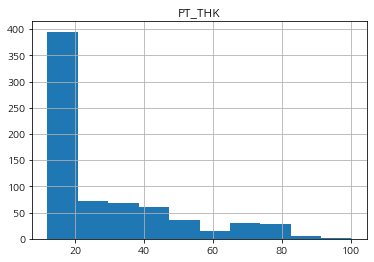

In [110]:
#이제 5개의 변수 하나하나의 히스토그램을 그려서 이상치를 확인해보자.
df_raw[['PT_THK']].hist()



#해당 설명변수는 이상치로 보이는 것은 없는 것 같다.
#이상치는 없지만, 다른 인사이트를 찾을 수 있을 것같아서 히스토그램을 들여다 보았다.
#아래의 히스토그램에 대해 고증을 해보자면 강종별로 두께의 범위가 다르다는 도메인지식으로  
 12mm~약 20mm, 20mm이상~55mm이하 , 56MM~100mm로 집단이 나누어 질 수도 있겠다는 생각이 들었다.
#혹시나 STEEL_KIND변수에서 스케일 불량 인자를 찾을 수도 있을 것 같다는 생각에 STEEL KIND종류 별 갯수,STEEL KIND종류에 따른 두께를 알아보았다.


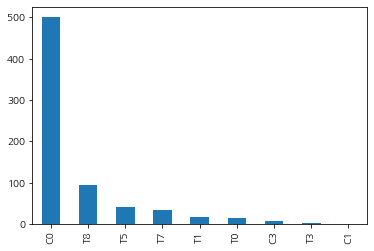

In [17]:
df_raw['STEEL_KIND'].value_counts().plot.bar()

In [18]:
df_raw['STEEL_KIND'].value_counts()

C0    501
T8     94
T5     41
T7     35
T1     18
T0     15
C3      7
T3      2
C1      1
Name: STEEL_KIND, dtype: int64

#위의 막대 그래프와 아래의 표를 통해서 T강종에 비해 C 강종이 513개로 가장많았다.

In [19]:
df_raw['PT_THK'].describe()

count    714.000000
mean      29.108091
std       18.994878
min       12.030000
25%       16.090000
50%       20.130000
75%       38.430000
max      100.340000
Name: PT_THK, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fedccfb2370>,
      dtype=object)

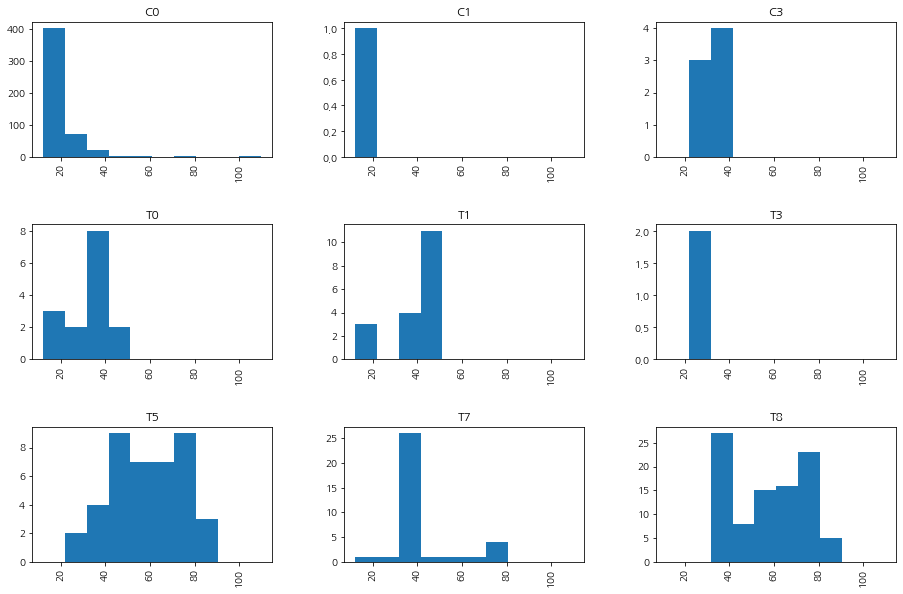

In [20]:
df_raw.hist(column='PT_THK',by= 'STEEL_KIND',range= (12,110),figsize =(15,10))


강종별 두께의 분포를 알고 싶어서 강종별 히스토그램을 한개 씩 그려보았다.
 위에 두께 분포를 보고 분류했던 강종집단을 아래의 히스토그램들을 통해 명확하게 확일할 수 있는데, 
명확하게 나눌수는 없었다. 다만 C 강종집단의 두께의 분포가 14.8MM~ 48MM정도인 것을 확인 할 수 있었고,
T 강종집단의분포는 12MM~100.34mm로 12~ 48mm까지 두 강종집단의 두께분포가 겹치는 것을 확인 할 수있었다.

In [21]:
#이제 목표변수인 스케일과 강종 및 두께 히스토그램을 한번에 그려보자
def my_plot(data, var1):
    
    
    plt.hist(data[data['SCALE']==0][var1],label ='양품', alpha =0.5)
    plt.hist(data[data['SCALE']==1][var1], label ='불량', alpha =0.5)
    plt.xlabel(var1)
    plt.ylabel('해당 설명변수에 따른 Scale분포')
    plt.legend()    

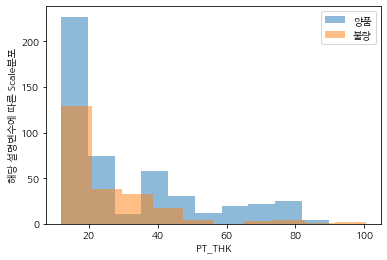

In [22]:
my_plot(df_raw, 'PT_THK')

해당 그래프를 보니 두께가 얊은 제품에 불량이 주로 분포했다.
위의 분석으로 얻은 두께가 얇은 강종은 c강종이 대부분이다는 결과를 토대로 
STEEL KIND 별 불량분포를 그려보았다.

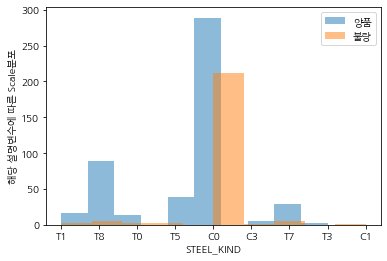

In [23]:
my_plot(df_raw, 'STEEL_KIND')

히스토그램을 그렸더니, C0 강종에서 많은 불량을 낸 것을 알 수있었다. 
C0강종의 불량율을 아래에서 구해보자

In [24]:
# 전체 불량 갯수
df_all=df_raw[df_raw['SCALE']== 0]
df_all['SCALE'].count() #전체 720개 제품중 231개 불량 
#전체 불량률 32%


# C0불량 갯수 212개
df_C=df_raw[df_raw['STEEL_KIND']== 'C0']
df_fail=df_C[df_C['SCALE']==1]
df_sus=df_C[df_C['SCALE']==1]
# print(df_fail['SCALE'].count() )

#C0 불량률
error = df_fail['SCALE'].value_counts()/df_C['SCALE'].count()
all_error =df_fail['SCALE'].value_counts()/df_raw['SCALE'].count()
# all_error

#C1불량갯수 1개
df_C1=df_raw[df_raw['STEEL_KIND']== 'C1']
df_fail1=df_C1[df_C1['SCALE']==0]
df_sus1=df_C1[df_C1['SCALE']==1]
df_fail1['SCALE'].count()
#C3 불량갯수 0개
df_C3=df_raw[df_raw['STEEL_KIND']== 'C3']
df_fail2=df_C3[df_C3['SCALE']==0]
df_sus2=df_C3[df_C3['SCALE']==1]
df_fail2['SCALE'].count()




6

#C0강종의 불량률을 계산해보니 212개로 42% 전체의 불량률 32%중에 29%나 차지하는 것을 알 수있었다. 
또한,전체데이터의 평균 불량률 32%보다 해당 강종의 불량률이 크므로 C0강종에 집중해서 불량인자를 찾아보는 방법도
좋은 방법인것 같다.
#나머지 C1,C2 것도 구해보면 C1은 1개의 관측지 중에 1개가 불량이었다. C3는 7개중 0개가 불량이었다.
결론적으로 전체 불량 231개 중에 두께가 상대적으로 얇은 C 강종의 불량갯수가 214개로 불량 92%를 차지 했다.
이러한 결과로 미루어보아 STEEL_KIND의 C 강종 과 T 강종 중에서 상대적으로 두께가 얇은 제품 중에서 
불량이 발생한 것을 알 수있다.
그러나 이러한 해석이 유의하지 않을 수도 있다
그 이유는 총 관측치 720개중 C0에 해당하는 관측치가 513개에 달하여 다른 강종의 두께분포를 명확하게 확인하는 것이 
어렵기때문이다. 데이터가 bias되어있어 이러한 결과를 얻었다고 생각한다.
만약에 강종별 관측치의 수가 비슷했다면 위의 해석은 유의해질 수도 있다.


###목표 변수 SCALE에 대한 PT_WIDTH와 STEEL_KIND 변수의 영향 확인

In [25]:
df_raw['PT_WDTH'].describe()


count     714.000000
mean     2809.885154
std       516.293303
min      1800.000000
25%      2469.000000
50%      2727.500000
75%      3125.000000
max      4575.000000
Name: PT_WDTH, dtype: float64

기술 통계량을 확인해보니 PT_WDTH 변수는 완전하지는 않지만 정규분포와 유사한 분포를 가지고 있다.

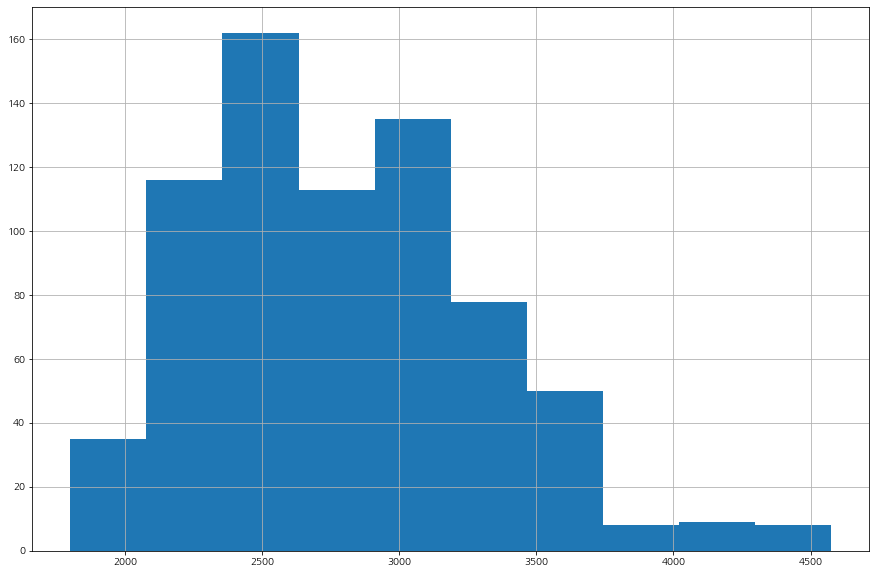

In [26]:
df_raw['PT_WDTH'].hist(figsize =( 15,10))

히스토그램을 그려서 해당 변수의 분포를 보니 1800MM~ 4575MM까지 대체적으로 균형잡힌 분포를 보이고 있음을 알 수있다.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fedc86c2790>,
      dtype=object)

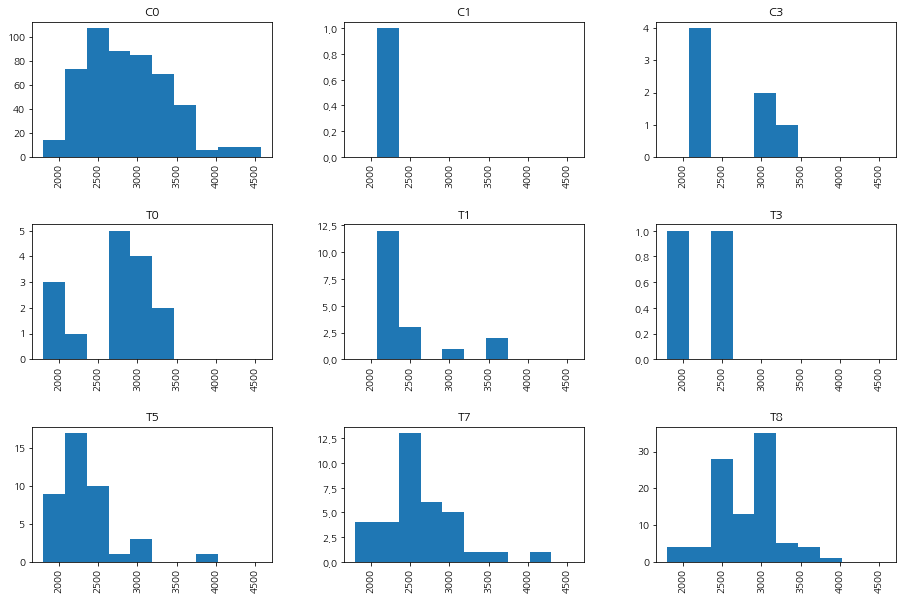

In [27]:
df_raw.hist(column='PT_WDTH',by= 'STEEL_KIND',range =(1800,4575),figsize =(15,10))

In [28]:
강종별 폭이 다를 것이라 생각했다. 강종에 따른 폭을 확인해보니 위에서 해석한대로 강종 C0은 관측치가 많아
대부분의 강종의 폭이 2000~ 4500 사이의 범위에서 균형잡힌 것으로 보기는 어렵다.

SyntaxError: invalid syntax (<ipython-input-28-d960d3e84f29>, line 1)

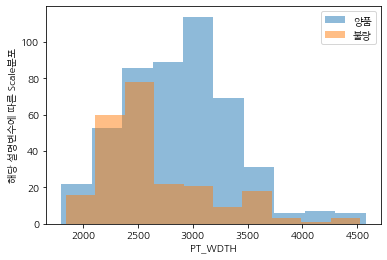

In [29]:
my_plot(df_raw,'PT_WDTH')

폭이 좁은 것에서 주로 불량이 나오는 경향이 있지만, 위의 분석결과에 따르면 이는 불량수의 92%를 차지하고 있는
C0에 의한 경향으로 보이고, 단순히 해석을하자면, 폭이 작은 제품의 불량율이 높은 것을 알 수있다.
위의 결과로 C0 강종 중 폭이 작은 제품에서 불량이 다수 발생했으므로 폭이 제품일 수록 불량에 영향을 미칠 수있겠다고
생각했다.

## 목표 변수 SCALE에 대한  PT_LENGTH변수의 영향 확인

In [30]:
df_raw['PT_LTH'].describe().round(3)

count      714.000
mean     34404.029
std      13799.227
min       7893.000
25%      22664.500
50%      37380.000
75%      43771.750
max      54917.000
Name: PT_LTH, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fedc82d7460>,
      dtype=object)

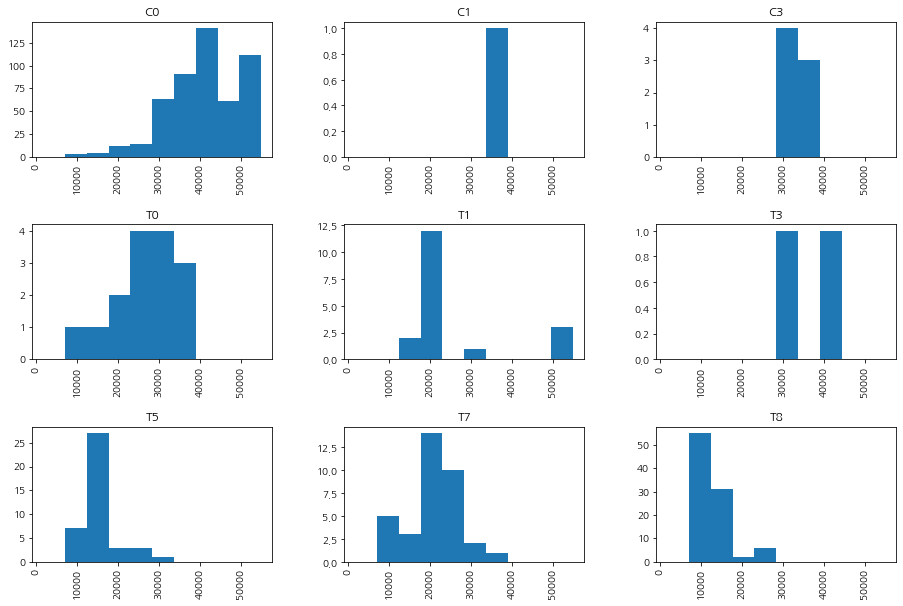

In [31]:
df_raw.hist(column='PT_LTH',by= 'STEEL_KIND',range =(1800,55000),figsize =(15,10), bins= 10)

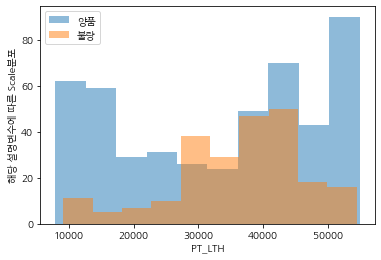

In [32]:
my_plot(df_raw, 'PT_LTH')

PT_LTH변수 플레이트 길이가 긴쪽에서 불량이 많이 발생했다.위의 강종별 플레이트 길이 히스토그램과 같이 보면
이 변수 또한 C0 강종의 PT_LTH에 속한 플레이트 두께에서 불량이 많이 발생한 것을 알 수있다.
그중에서도 평균 불량율 32%가 넘는 길이는 약 27000mm ~44000mm로 이사이의 제품에서 불량이 많이 발생 한 것으로 보인다.

# 목표 변수 SCALE에 대한  PT_WGT변수의 영향 확인

In [33]:
df_raw['PT_WGT'].describe().round(3)

count       714.000
mean      41506.078
std       24799.277
min        7820.000
25%       17780.000
50%       36090.000
75%       61120.000
max      115080.000
Name: PT_WGT, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fedc8089850>,
      dtype=object)

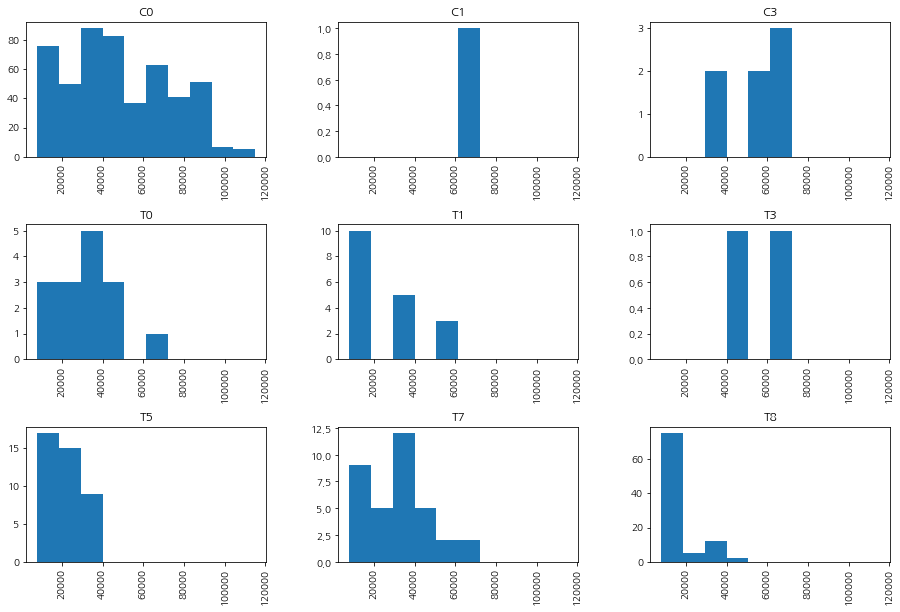

In [34]:
df_raw.hist(column='PT_WGT',by= 'STEEL_KIND',range =(7820,115080),figsize =(15,10), bins= 10)

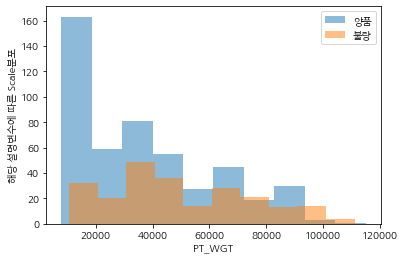

In [112]:
my_plot(df_raw, 'PT_WGT')

플레이트 중량 변수에서는 중량이 약 37000kg 이상 부터 무거워질수록 불량률이 높아지는 경향을 볼 수있었다.

플레이트 생산 지시 두께, 폭 변수는  해당 변수의 관측값이 작을 수록 불량률이 커지는 것을 알 수 있었고, 
길이 변수는 관측값이 증가할 수록 불량인 경우가 많았다.
중량 변수 또한 관측값이 증가할 수록 불량률이 높아지는 것을 육안으로 확인할 수 있었다.
# 그러나 생산 지시 두께, 폭, 길이, 중량은 우리가 제한 할 수없으므로 해당 변수를 개선할 수 있는 변수로 보기는 어렵다.

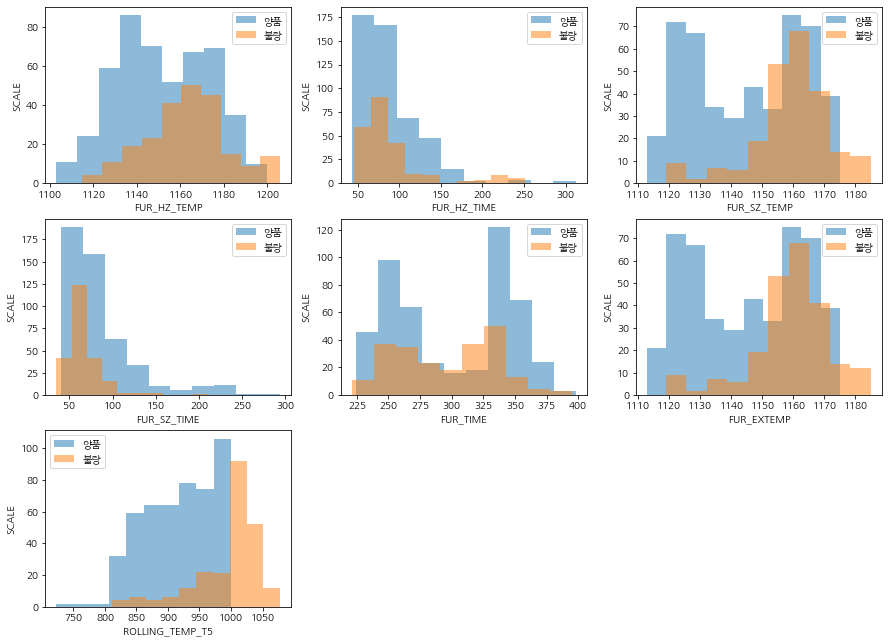

In [114]:
# 연속형 변수 히스토그램 그리기 
i = 0
fig = plt.figure(figsize = (15, 50))
columns = df_raw_numeric_x.columns[5:12]
for col in columns:
    plt.subplot(df_raw_numeric.shape[1], 3, i+1)
    i += 1
    plt.hist(df_raw[df_raw["SCALE"] == 0][col], label = "양품", alpha = 0.5)
    plt.hist(df_raw[df_raw["SCALE"] == 1][col], label = "불량", alpha = 0.5)
    plt.xlabel(col)
    plt.ylabel("SCALE")
    plt.legend()
plt.show()

지금부터는 우리가 개선할 수 있는 변수들에 대한 그래프분석을 해보려고한다.
지시 두께,폭 길이 변수를 제외한 나머지 연속형 변수의 양품 및 불량의 수를 히스토그램을 나타내보았다.

2. 가열로 온도 변수는 약 1143도 부터 평균 불량률 32%를 넘기시작하고, 약 1190도 이상에서는 불량률이 급격하게 증가해서 약 1200이상에서는 100% 불량을 나타내는 것을 볼 수있다
3. 가열로 가열대 에서 머무는 시간이 짧은쪽에 불량이 몰려있는 것을 확인 할 수있고, 약110초 이상에서는 불량률이 급격하게 줄어든것을 확인 할 수있다.
4.가열로 균열대 온도변수는 약 1145도 이상에서 불량율이 급격하게 증가하는 것을 확인 할 수있고, 1175도이상에서는 100%의 불량률을 보인다.
4. 가열로 균열대에서 머무는 시간 변수도 시간이 짧은 제품에 불량이 몰려있는 것을 확인할 수있다.
5. 가열로에서 머무는 시간은 FUR_HZ_TIME + FUR_SZ_TIME라고 할 수있는데 255도 ~325도 사이의 불량이 유난히 많은 것 같다. 
6.FUR_EXTEMP(추출온도)변수에서는 온도가 높을 수록 불량이 증가하는 경향이 있다.
7.ROLLING_TEMP_T5

# 대부분의 연속형 변수에서 불량률과 연관이 있는 것으로 
# 그래프 분석 결과 나타났다.
# 그중에서도 PT_WDTH, ROLLING_TEMP_T5 , FUR_EXTEMP ,FUR_SZ_TEMP, 

# FUR_SZ_TIME 변수가 영향을 많이 미치는 것 같다
# 그러나 PT_WDTH는 생산 지시 변수이기 때문에 우리가 개선할 수있는 방법이 없을 듯하다.

# 따라서  연속형 변수 중 그래프 EDA를 통해 얻은 VF는 ROLLING_TEMP_T5 , FUR_EXTEMP ,FUR_SZ_TEMP, FUR_SZ_TIME 이다.

 

# 범주형 변수 탐색적 분석 (EDA)

In [37]:
#교차표 생성
def myplot2(data, var):
    print(pd.crosstab(index = data['SCALE'], columns = data[var]))
    print()
    print(pd.crosstab(index = data['SCALE'], columns = data[var], normalize = 'columns'))
    

def pie1(data,var):
    # df_raw['SCALE'] = df_raw['SCALE'].map(lambda x : 0 if x == "양품" else 1)
    df_groups = data.groupby([var])["SCALE"]
    df_w = pd.DataFrame(columns = [var, "SCALE_PROB"])
    c = 0.0
    for name, g in df_groups:
        c += g.tolist().count(1)/(g.shape[0])
        df_w = df_w.append({var  : name , "SCALE_PROB" : (g.tolist().count(1)/(g.shape[0])) * 100}, ignore_index = True )
    df_w
    df_w.plot.pie(y = "SCALE_PROB", labels = \
                 df_w[var], autopct= "%.1f%%", radius = 2, legend = False)

In [38]:
df_sub = df_raw[df_raw["SCALE"] == 0]
df_count = df_sub.groupby("STEEL_KIND", as_index = False).agg("count")
# 불량인 데이터를 추출 후 강종으로 그룹화하고, 강종별  불량을 카운트한다.

1.강종별 스케일불량 

STEEL_KIND   C0  C1  C3  T0  T1  T3  T5  T7  T8
SCALE                                          
0           289   0   6  13  16   2  39  29  89
1           212   1   1   2   2   0   2   6   5

STEEL_KIND        C0   C1        C3        T0        T1   T3       T5  \
SCALE                                                                   
0           0.576846  0.0  0.857143  0.866667  0.888889  1.0  0.95122   
1           0.423154  1.0  0.142857  0.133333  0.111111  0.0  0.04878   

STEEL_KIND        T7        T8  
SCALE                           
0           0.828571  0.946809  
1           0.171429  0.053191  


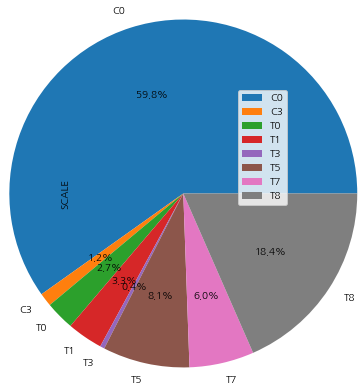

In [39]:
df_count.plot.pie(y = "SCALE", labels = df_count["STEEL_KIND"], autopct= "%.1f%%", radius = 2)
myplot2(df_raw,'STEEL_KIND')


앞쪽의 지시 변수(두께,폭,길이,중량)를 제외하고 STEEL_KIND 변수로 강종별 불량율을 크로스탭, 파이차트로 그려보았다.
차트를 확인해보면 불량의 대부분이 강종 C0로 인것을 알 수있다. 그리고 연속형 변수 EDA할 때 얻었던 결과와 같이
C0 강종에 비해 다른 강종들의 데이터 수가 지극히 작은 것으로 보아 C0라서 불량률이 높다라고 단정짓기는 어려울 것 같다.



In [40]:
 HSB ROLLING_DESCALING WORK_GR

SyntaxError: invalid syntax (<ipython-input-40-b389c40c0ceb>, line 1)

2. 가열로 호기 별 불량율

FUR_NO  1호기  2호기  3호기
SCALE                
0       166  166  151
1        73   70   88

FUR_NO       1호기      2호기       3호기
SCALE                              
0       0.694561  0.70339  0.631799
1       0.305439  0.29661  0.368201


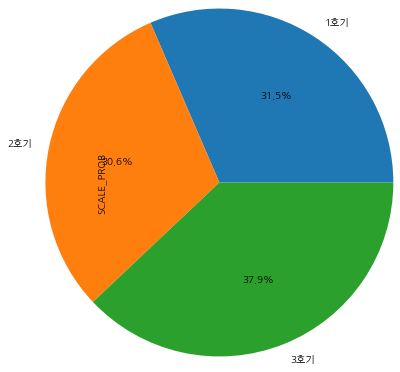

In [41]:
myplot2(df_raw, 'FUR_NO')
pie1(df_raw, 'FUR_NO')

가열로 호에 따른 스케일 불량율을 나타내는 파이차트와  가열로 호수에 따른 불량유무 교차표이다.
이를 보면 3호기에서 불량이 가장 많이 난 것을 알 수있다.
하지만, 대체적으로 30%의 불량율을 보인것으로 보아 각 호수기다마 유의한 차이를 가지 있지는 않은 것같다.
또한, 해당 가열로의 자체 문제일 수있으므로, 해당 가열로를 검사해봐야 할 것 같다.
## 집단이 3집단이므로 불량율의 차이가 유의한지
## F 검정을 통해 통계적 검정을 해봐야한다.

3. 가열로 작업순번에 따른 스케일 불량율

FUR_NO_ROW    1    2
SCALE               
0           239  244
1           120  111

FUR_NO_ROW         1         2
SCALE                         
0           0.665738  0.687324
1           0.334262  0.312676


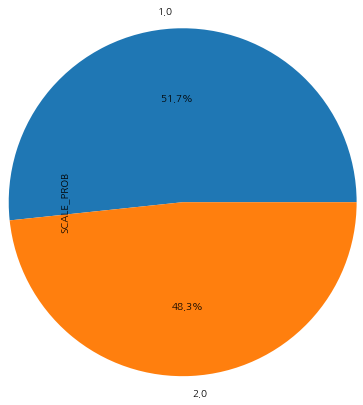

In [42]:
myplot2(df_raw, 'FUR_NO_ROW')
pie1(df_raw, 'FUR_NO_ROW')

FUR_NO_ROW(가열로 작업순번)변수에서 작업순번 1인경우에  359개 중 120개가 불량, 불량율 33% 
작업순번 2인경우에 355개 중 111개 불량 불량율 31%
SCALE 불량의 구성비는 작업순번 1 = 51%, 작업순번 2 = 48.0%으로 대체적으로 비슷한 수치를 보인다.
따라서 가열로 작업순번 변수는 두개의 범주 큰 차이를 보이지않으므로 불량에 큰 영향을 미치지 않는 것으로 보인다.

## 카이검정으로 통계적으로 유의한 차이가 있는지 확인해보아야한다.

HSB 적용 여부에 따른 불량율

HSB    미적용   적용
SCALE          
0        0  483
1       33  198

HSB    미적용        적용
SCALE               
0      0.0  0.709251
1      1.0  0.290749


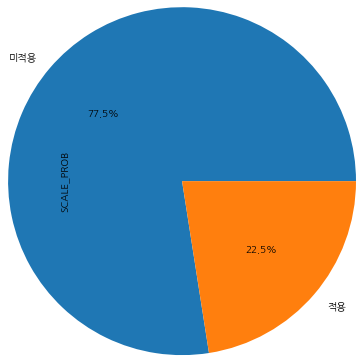

In [43]:
myplot2(df_raw, 'HSB')
pie1(df_raw, 'HSB')


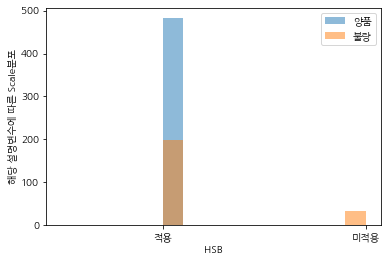

In [44]:
my_plot(df_raw,'HSB')

HSB변수는 불량여부에 매우 큰 영향을 미치는 것 같다.
위의 교차표를 보면 HSB를 적용하지 않은 33개 중에 33개 모두다 불량으로 판정된 것을 볼 수있다.
따라서 HSB가 미적용된 제품에서 불량이 발생할 확률이 매우 높은 것을 알 수 있다.
HSB를 미적용한 강종이 어떤 것 인지 알아보았다.

In [45]:
df_c0 = df_raw[df_raw['HSB']=='미적용']
df_c0['STEEL_KIND'].value_counts()
# df_c0[df_c0['STEEL_KIND']== 'CO']
# df_c0[df_c0['HSB']== '미적용']['CO'].count()

C0    22
T7     4
T8     3
T5     2
C3     1
T1     1
Name: STEEL_KIND, dtype: int64

결과는 HSB를 미적용한 제품의 대부분은 C0가 차지하고 있는 것을 확인할 수 있다.


작업조 별 불량율

WORK_GR   1조   2조   3조   4조
SCALE                      
0        121  119  115  128
1         67   45   54   65

WORK_GR        1조       2조        3조        4조
SCALE                                         
0        0.643617  0.72561  0.680473  0.663212
1        0.356383  0.27439  0.319527  0.336788


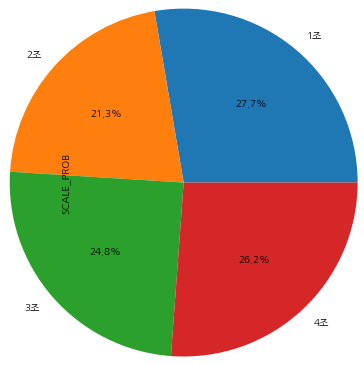

In [46]:
myplot2(df_raw, 'WORK_GR')
pie1(df_raw, 'WORK_GR')


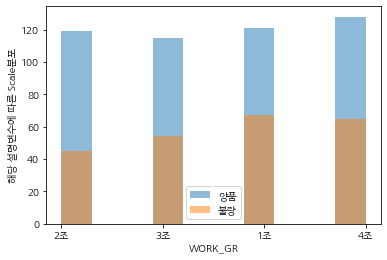

In [47]:
my_plot(df_raw, 'WORK_GR')

작업조 별 불량율을 확인해보았더니 1조가 불량율이 가장 높았다.
그러나 작업조의 작업방식, 작업률, 작업패턴 등은 해당 데이터에서 알 수 없으므로 해당 변수에서 개선이 가능한 것은 없어보인다.
## 비율이 같다고 봐야하는 지 통계적으로 확인하기 위하여 카이스퀘어검정 필요

ROLLING_DESCALING(디스케일링 횟수에 따른 불량율

ROLLING_DESCALING  5    6   7    8   9    10
SCALE                                       
0                   0  146   0  109   0  228
1                   5   26  15   99  20   66

ROLLING_DESCALING   5         6    7         8    9        10
SCALE                                                        
0                  0.0  0.848837  0.0  0.524038  0.0  0.77551
1                  1.0  0.151163  1.0  0.475962  1.0  0.22449


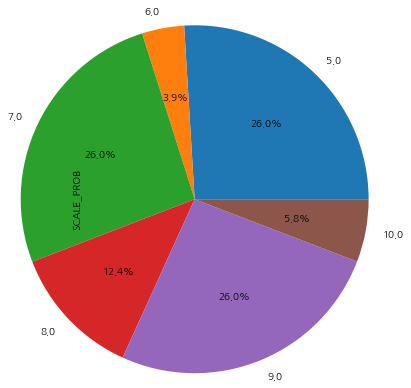

In [48]:
myplot2(df_raw, 'ROLLING_DESCALING')
pie1(df_raw, 'ROLLING_DESCALING')


ROLLING DESCALING 같은 경우 조압연 및 사상압연시 롤러로 왕복을하며 디스케일링을 하는 것이다.
이 때문에 ROLLING DESCALING횟수가 높다는 것은 HSB를 적용하지 않았을 경우 일수도 있다는 생각이 들어
롤링 디스케일 횟수별 HSB 적용 여부를 확인하고자 하였다.

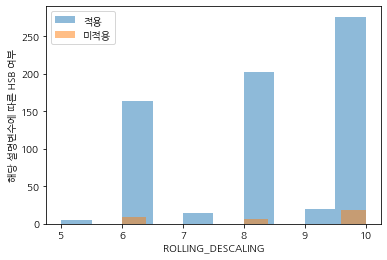

In [49]:
def my_plot3(data, var1):
    
    
    plt.hist(data[data['HSB']=='적용'][var1],label ='적용', alpha =0.5)
    plt.hist(data[data['HSB']=='미적용'][var1], label ='미적용', alpha =0.5)
    plt.xlabel(var1)
    plt.ylabel('해당 설명변수에 따른 HSB 여부')
    plt.legend()
my_plot3(df_raw, 'ROLLING_DESCALING')

확인결과 HSB적용여부와 ROLLING_DESCALING 횟수와는 관계가 없는 것으로 보인다.
ROLLING DESCALING 횟수에 따른 불량율을 보면 디스케일링을 8번했을 때 불량율이 가장 높았다.
이러한 결과를 종합해 볼때  ROLLING DESCALING 횟수는 불량여부에 영향을 준다고 말할 수 있다.


# 기술적 탐색
## 모델링을 통한 Vital Few도출 (Decision TREE)

In [50]:
#사용할 데이터 확인
df_raw.head()

,SCALE,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,0,T1,32.25,3707,15109,14180,1호기,1,1144,116,1133,59,282,1133,934,적용,8,2조
1,0,T1,32.25,3707,15109,14180,1호기,2,1144,122,1135,53,283,1135,937,적용,8,2조
2,0,T8,33.27,3619,19181,18130,2호기,1,1129,116,1121,55,282,1121,889,적용,8,3조
3,0,T8,33.27,3619,19181,18130,2호기,2,1152,125,1127,68,316,1127,885,적용,8,3조
4,0,T8,38.33,3098,13334,12430,3호기,1,1140,134,1128,48,314,1128,873,적용,8,1조


In [51]:
# 더미 생성
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.info()

#원래 더미를 생성해야한다. 더미를 생성해야하는 때는 데이터의 설명변수 즉 컬럼에 범주형 변수가 존재할 때 하는 것이다
#그러나 해당 유방암 데이터에서는 설명 변수에 범주형 변수가 존재하지 않기때문에 해당 과정을 생략한다.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 719
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SCALE              714 non-null    int64  
 1   PT_THK             714 non-null    float64
 2   PT_WDTH            714 non-null    int64  
 3   PT_LTH             714 non-null    int64  
 4   PT_WGT             714 non-null    int64  
 5   FUR_HZ_TEMP        714 non-null    int64  
 6   FUR_HZ_TIME        714 non-null    int64  
 7   FUR_SZ_TEMP        714 non-null    int64  
 8   FUR_SZ_TIME        714 non-null    int64  
 9   FUR_TIME           714 non-null    int64  
 10  FUR_EXTEMP         714 non-null    int64  
 11  ROLLING_TEMP_T5    714 non-null    int64  
 12  ROLLING_DESCALING  714 non-null    int64  
 13  STEEL_KIND_C0      714 non-null    uint8  
 14  STEEL_KIND_C1      714 non-null    uint8  
 15  STEEL_KIND_C3      714 non-null    uint8  
 16  STEEL_KIND_T0      714 non

In [52]:
df_raw_dummy.head()

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,...,FUR_NO_2호기,FUR_NO_3호기,FUR_NO_ROW_1,FUR_NO_ROW_2,HSB_미적용,HSB_적용,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조
0,0,32.25,3707,15109,14180,1144,116,1133,59,282,...,0,0,1,0,0,1,0,1,0,0
1,0,32.25,3707,15109,14180,1144,122,1135,53,283,...,0,0,0,1,0,1,0,1,0,0
2,0,33.27,3619,19181,18130,1129,116,1121,55,282,...,1,0,1,0,0,1,0,0,1,0
3,0,33.27,3619,19181,18130,1152,125,1127,68,316,...,1,0,0,1,0,1,0,0,1,0
4,0,38.33,3098,13334,12430,1140,134,1128,48,314,...,0,1,1,0,0,1,1,0,0,0


In [53]:
df_raw_x =df_raw_dummy.drop(['SCALE'],axis = 1, inplace = False) # 설명변수 데이터 프레임
df_raw_y =df_raw_dummy['SCALE'] # 목표변수 시리즈
df_raw_x.head()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,...,FUR_NO_2호기,FUR_NO_3호기,FUR_NO_ROW_1,FUR_NO_ROW_2,HSB_미적용,HSB_적용,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조
0,32.25,3707,15109,14180,1144,116,1133,59,282,1133,...,0,0,1,0,0,1,0,1,0,0
1,32.25,3707,15109,14180,1144,122,1135,53,283,1135,...,0,0,0,1,0,1,0,1,0,0
2,33.27,3619,19181,18130,1129,116,1121,55,282,1121,...,1,0,1,0,0,1,0,0,1,0
3,33.27,3619,19181,18130,1152,125,1127,68,316,1127,...,1,0,0,1,0,1,0,0,1,0
4,38.33,3098,13334,12430,1140,134,1128,48,314,1128,...,0,1,1,0,0,1,1,0,0,0


In [54]:
df_train_x, df_test_x , df_train_y, df_test_y = \
train_test_split(df_raw_x, df_raw_y, test_size= 0.3, random_state=9981) 
print('train data X size:{}'.format(df_train_x.shape))
print('train data Y size:{}'.format(df_train_y.shape))
print('test data X size:{}'.format(df_test_x.shape))
print('test data Y size:{}'.format(df_test_y.shape))

train data X size:(499, 32)
train data Y size:(499,)
test data X size:(215, 32)
test data Y size:(215,)


In [55]:
df_train_x, df_val_x, df_train_y, df_val_y = \
train_test_split(df_train_x,df_train_y, train_size=4/7, random_state=9981)

print('train data X size:{}'.format(df_train_x.shape))
print('train data Y size:{}'.format(df_train_y.shape))
print('test data X size:{}'.format(df_test_x.shape))
print('test data Y size:{}'.format(df_test_y.shape))
print('val data X size:{}'.format(df_val_x.shape))
print('val data Y size:{}'.format(df_val_y.shape))


train data X size:(285, 32)
train data Y size:(285,)
test data X size:(215, 32)
test data Y size:(215,)
val data X size:(214, 32)
val data Y size:(214,)


In [56]:

tree_uncustomized =DecisionTreeClassifier(random_state = 9981)
tree_uncustomized.fit(df_train_x, df_train_y)
#train 데이터 설명력
print('Score on training set: {:.3f}'.format(tree_uncustomized.score(df_train_x,df_train_y)))
#test 데이터 설명력
print('Score on test set: {:.3f}'.format(tree_uncustomized.score(df_val_x, df_val_y)))
#default 모델을 test 데이터 셋으로 검증해본 결과
# train set에서는 정확도를 100%를 보이고 test set 에서는 정확도 100%로 나왔다.


Score on training set: 1.000
Score on test set: 0.944


In [57]:
tree_uncustomized

DecisionTreeClassifier(random_state=9981)

In [58]:

v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_uncustomized.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)[:5]



,Feature,Importance
10,ROLLING_TEMP_T5,0.620
9,FUR_EXTEMP,0.134
26,HSB_미적용,0.132
11,ROLLING_DESCALING,0.024
5,FUR_HZ_TIME,0.020


Text(0, 0.5, '변수')

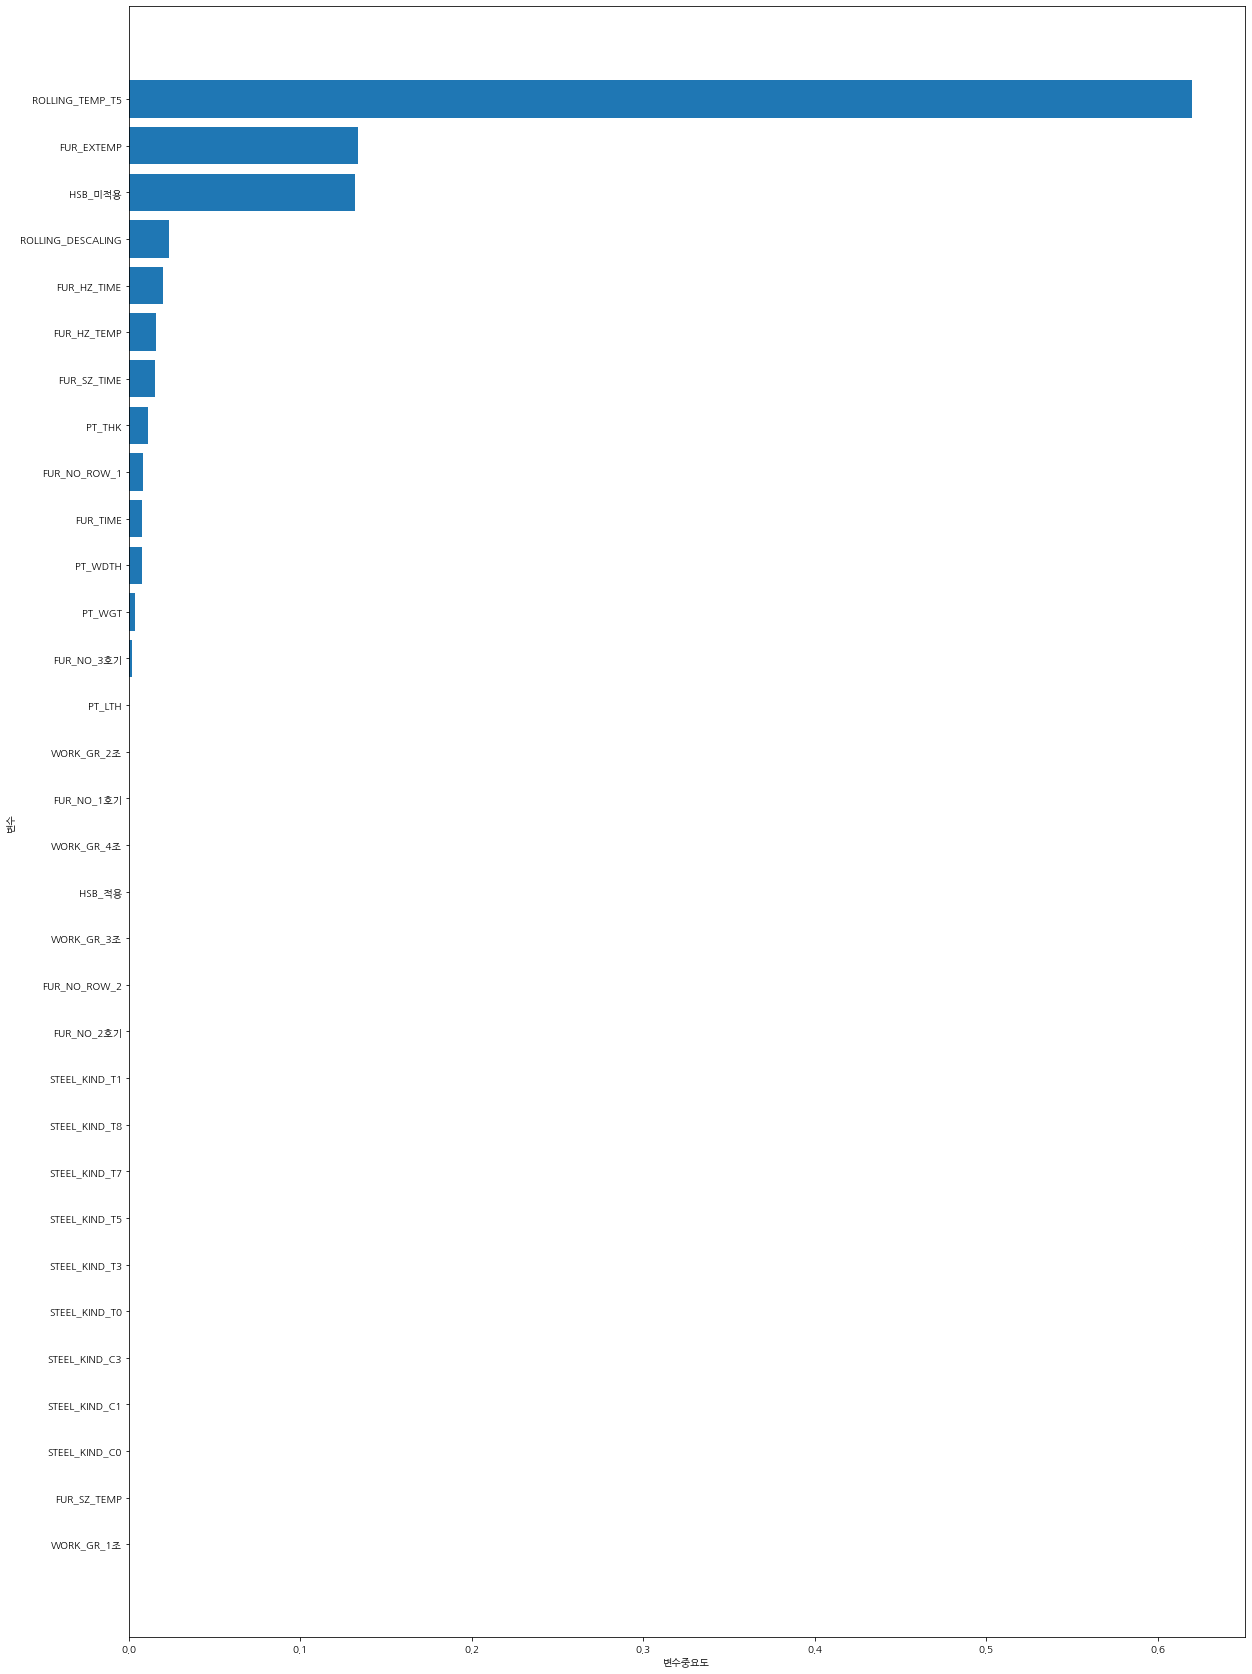

In [59]:
df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_importance))
fig = plt.figure(figsize = (20, 30))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수중요도')
plt.ylabel('변수')

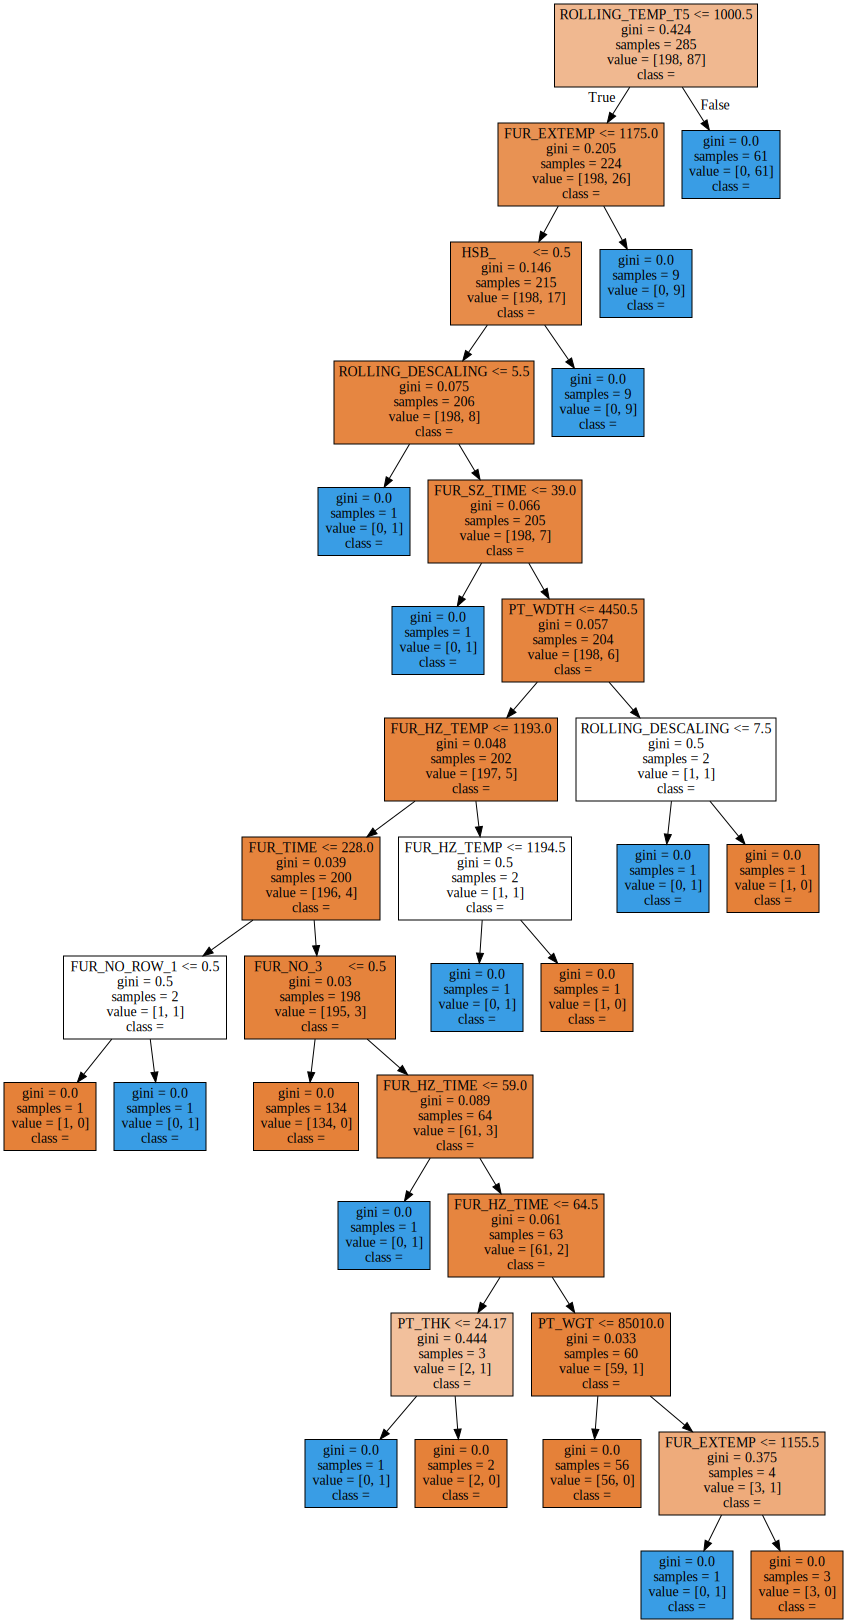

In [62]:
tu = DecisionTreeClassifier(random_state = 9981)
tu.fit(df_train_x, df_train_y)
export_graphviz(tu, out_file = 'tree_depth.dot', class_names= ['양품',"불량"], feature_names = v_feature_name, impurity = True, filled =True)
with open('tree_depth.dot')as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

변수 중요도 차트를 보면 ROLLING_TEMP_5, FUR_EXTEMP, HSB_적용, ROLLING_DESCALING_9 ROLLING_DESCALING_7 순으로
불량에 영향을 미치는 것을 알 수있다. 

### 로지스틱 회귀분석

In [63]:
틱# df_raw_y =df_raw['SCALE']
# df_raw_x =df_raw.drop('SCALE',axis = 1, inplace= False)

In [64]:
df_train, df_test  =\
train_test_split(df_raw, test_size=0.3, random_state=9981)
print('train data X size:{}'.format(df_train_x.shape))
print('train data Y size:{}'.format(df_train_y.shape))
print('test data X size:{}'.format(df_test_x.shape))
print('test data Y size:{}'.format(df_test_y.shape))

train data X size:(285, 32)
train data Y size:(285,)
test data X size:(215, 32)
test data Y size:(215,)


In [65]:
df_train, df_val =\
train_test_split(df_train, train_size=3/7, random_state=9981)

print('train data X size:{}'.format(df_train_x.shape))
print('train data Y size:{}'.format(df_train_y.shape))
print('test data X size:{}'.format(df_test_x.shape))
print('test data Y size:{}'.format(df_test_y.shape))
print('val data X size:{}'.format(df_val_x.shape))
print('val data Y size:{}'.format(df_val_y.shape))

train data X size:(285, 32)
train data Y size:(285,)
test data X size:(215, 32)
test data Y size:(215,)
val data X size:(214, 32)
val data Y size:(214,)


In [66]:

df_raw = df_raw.astype({'SCALE' : 'object'})
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 719
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SCALE              714 non-null    object 
 1   STEEL_KIND         714 non-null    object 
 2   PT_THK             714 non-null    float64
 3   PT_WDTH            714 non-null    int64  
 4   PT_LTH             714 non-null    int64  
 5   PT_WGT             714 non-null    int64  
 6   FUR_NO             714 non-null    object 
 7   FUR_NO_ROW         714 non-null    object 
 8   FUR_HZ_TEMP        714 non-null    int64  
 9   FUR_HZ_TIME        714 non-null    int64  
 10  FUR_SZ_TEMP        714 non-null    int64  
 11  FUR_SZ_TIME        714 non-null    int64  
 12  FUR_TIME           714 non-null    int64  
 13  FUR_EXTEMP         714 non-null    int64  
 14  ROLLING_TEMP_T5    714 non-null    int64  
 15  HSB                714 non-null    object 
 16  ROLLING_DESCALING  714 non

In [67]:
## 모델 및 회귀계수 검토
#from_formula 함수를 이용하여 변수 역할 지정
log_model = Logit.from_formula("""SCALE ~ PT_THK + PT_WDTH + PT_LTH + FUR_EXTEMP
 +FUR_HZ_TEMP+FUR_HZ_TIME+FUR_SZ_TIME+FUR_TIME+
ROLLING_TEMP_T5+ C(HSB)+C(ROLLING_DESCALING)+C(WORK_GR)""", df_train)#적합
log_result = log_model.fit()#결과 출력
print(log_result.summary())

         Current function value: 0.083457
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  213
Model:                          Logit   Df Residuals:                      194
Method:                           MLE   Df Model:                           18
Date:                Tue, 24 Nov 2020   Pseudo R-squ.:                  0.8635
Time:                        23:14:46   Log-Likelihood:                -17.776
converged:                      False   LL-Null:                       -130.20
Covariance Type:            nonrobust   LLR p-value:                 1.020e-37
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   -398.5821   7.66e+04     -0.005      0.996   -1.51e+05     1.5e+05
C(HSB)[T.적용]     

/home/piai/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


# 랜덤포레스트

In [68]:
rf_uncustomized =RFC(random_state =9981)
rf_uncustomized.fit(df_train_x, df_train_y)
print('Score on training set: {:.3f}'.format(rf_uncustomized.score(df_train_x,df_train_y)))
#test 데이터 설명력
print('Score on test set: {:.3f}'.format(rf_uncustomized.score(df_val_x, df_val_y)))

Score on training set: 1.000
Score on test set: 0.963


In [69]:
#설명 변수의 중요도: feature_importances

#변수명 저장
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_uncustomized.feature_importances_

#df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)


,Feature,Importance
10,ROLLING_TEMP_T5,0.321
1,PT_WDTH,0.083
6,FUR_SZ_TEMP,0.080
9,FUR_EXTEMP,0.068
0,PT_THK,0.063
27,HSB_적용,0.054
11,ROLLING_DESCALING,0.046
4,FUR_HZ_TEMP,0.037
12,STEEL_KIND_C0,0.033
2,PT_LTH,0.032


랜덤 포레스트 기본모델로 VF를 파악해본 결과
ROLLING_TEMP_T5	PT_WDTH FUR_SZ_TEMP	FUR_EXTEMP PT_THK FUR_HZ_TEMP  HSB_미적용	HSB_적용순으로 변수 중요도가 생성되었다. 

Text(0, 0.5, '변수')

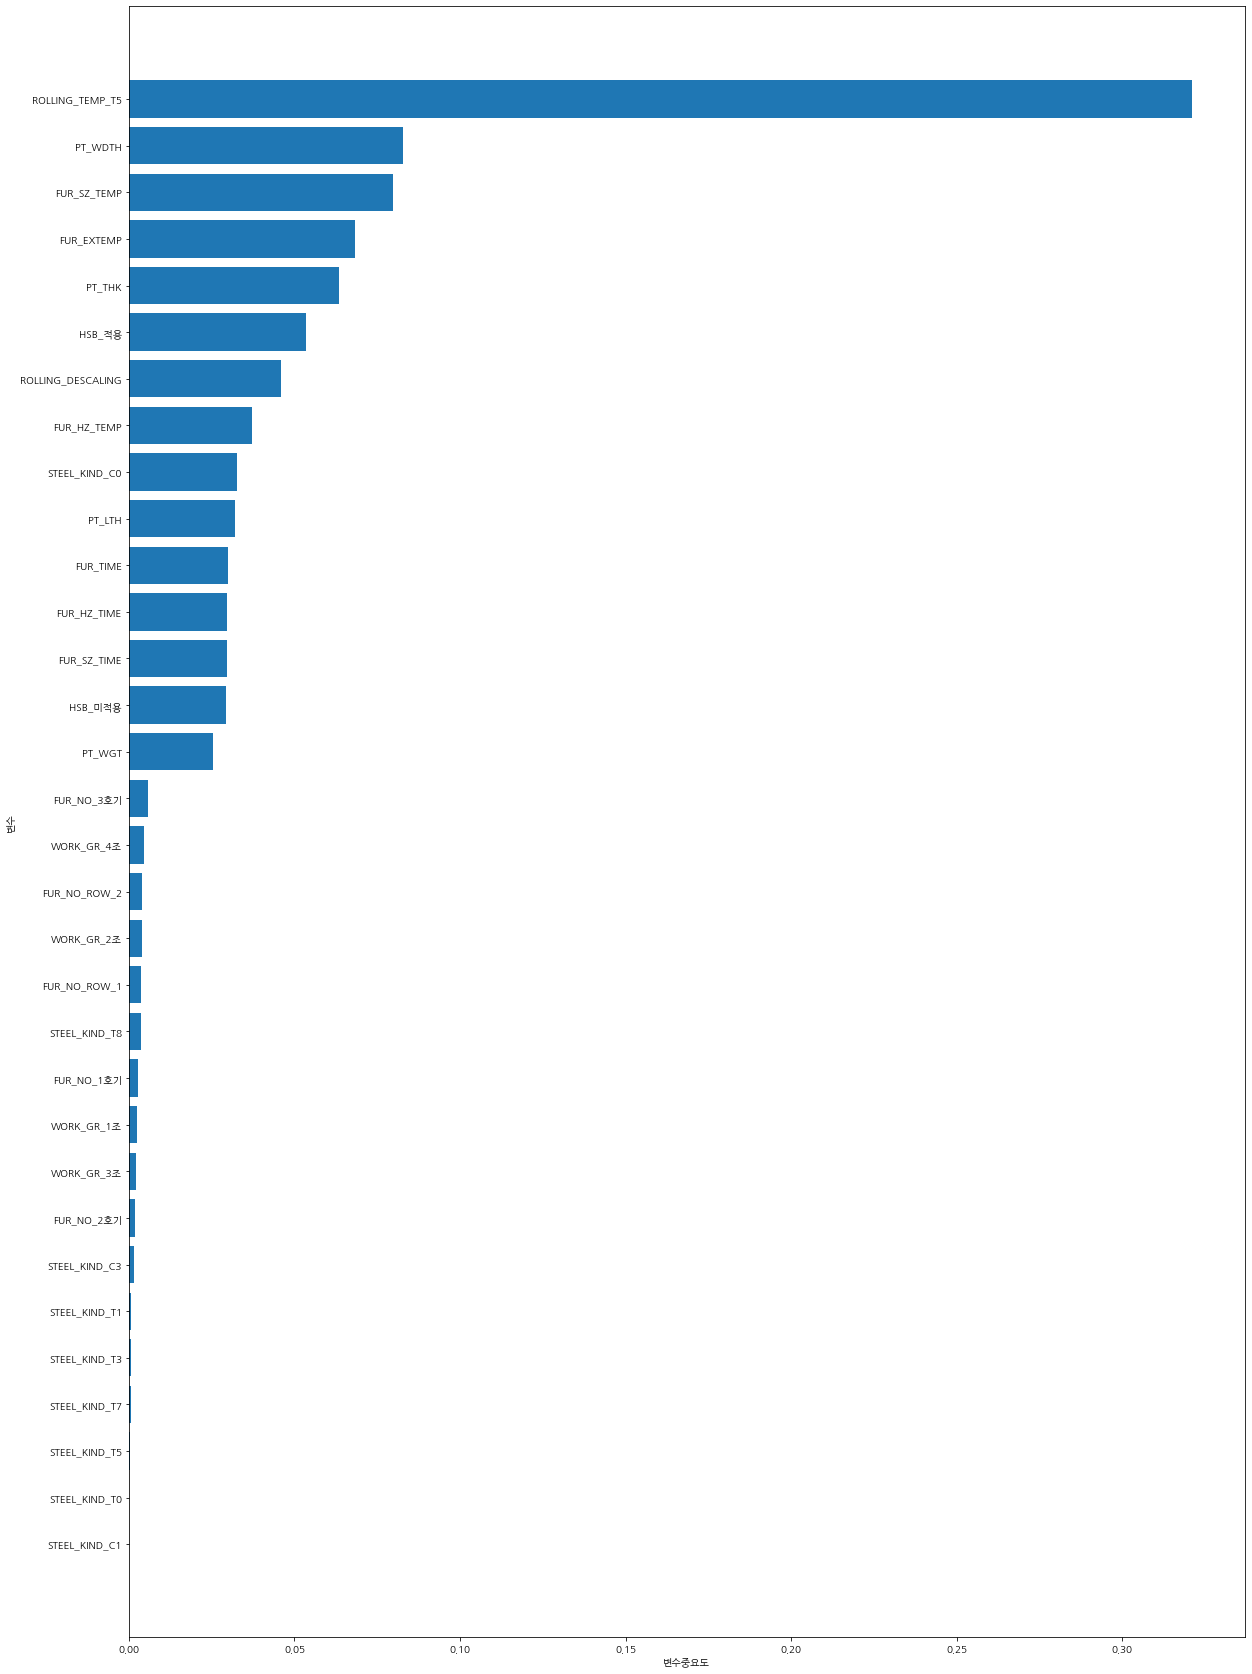

In [70]:
#설명변수 중요도그래프, 중요도가 높은 변수를 상위에 그림
df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_importance))
fig = plt.figure(figsize = (20, 30))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수중요도')
plt.ylabel('변수')

In [71]:
gb_uncustomized =GBC(random_state = 9981)
gb_uncustomized.fit(df_train_x, df_train_y)
print('Score on training set: {:.3f}'.format(gb_uncustomized.score(df_train_x,df_train_y)))
#test 데이터 설명력
print('Score on test set: {:.3f}'.format(gb_uncustomized.score(df_val_x, df_val_y)))

Score on training set: 1.000
Score on test set: 0.972


In [72]:
#설명 변수의 중요도: feature_importances

#변수명 저장
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = gb_uncustomized.feature_importances_

#df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)[:10]

,Feature,Importance
10,ROLLING_TEMP_T5,0.635
9,FUR_EXTEMP,0.090
26,HSB_미적용,0.079
27,HSB_적용,0.050
6,FUR_SZ_TEMP,0.042
0,PT_THK,0.029
11,ROLLING_DESCALING,0.024
4,FUR_HZ_TEMP,0.014
7,FUR_SZ_TIME,0.014
1,PT_WDTH,0.009


Text(0, 0.5, '변수')

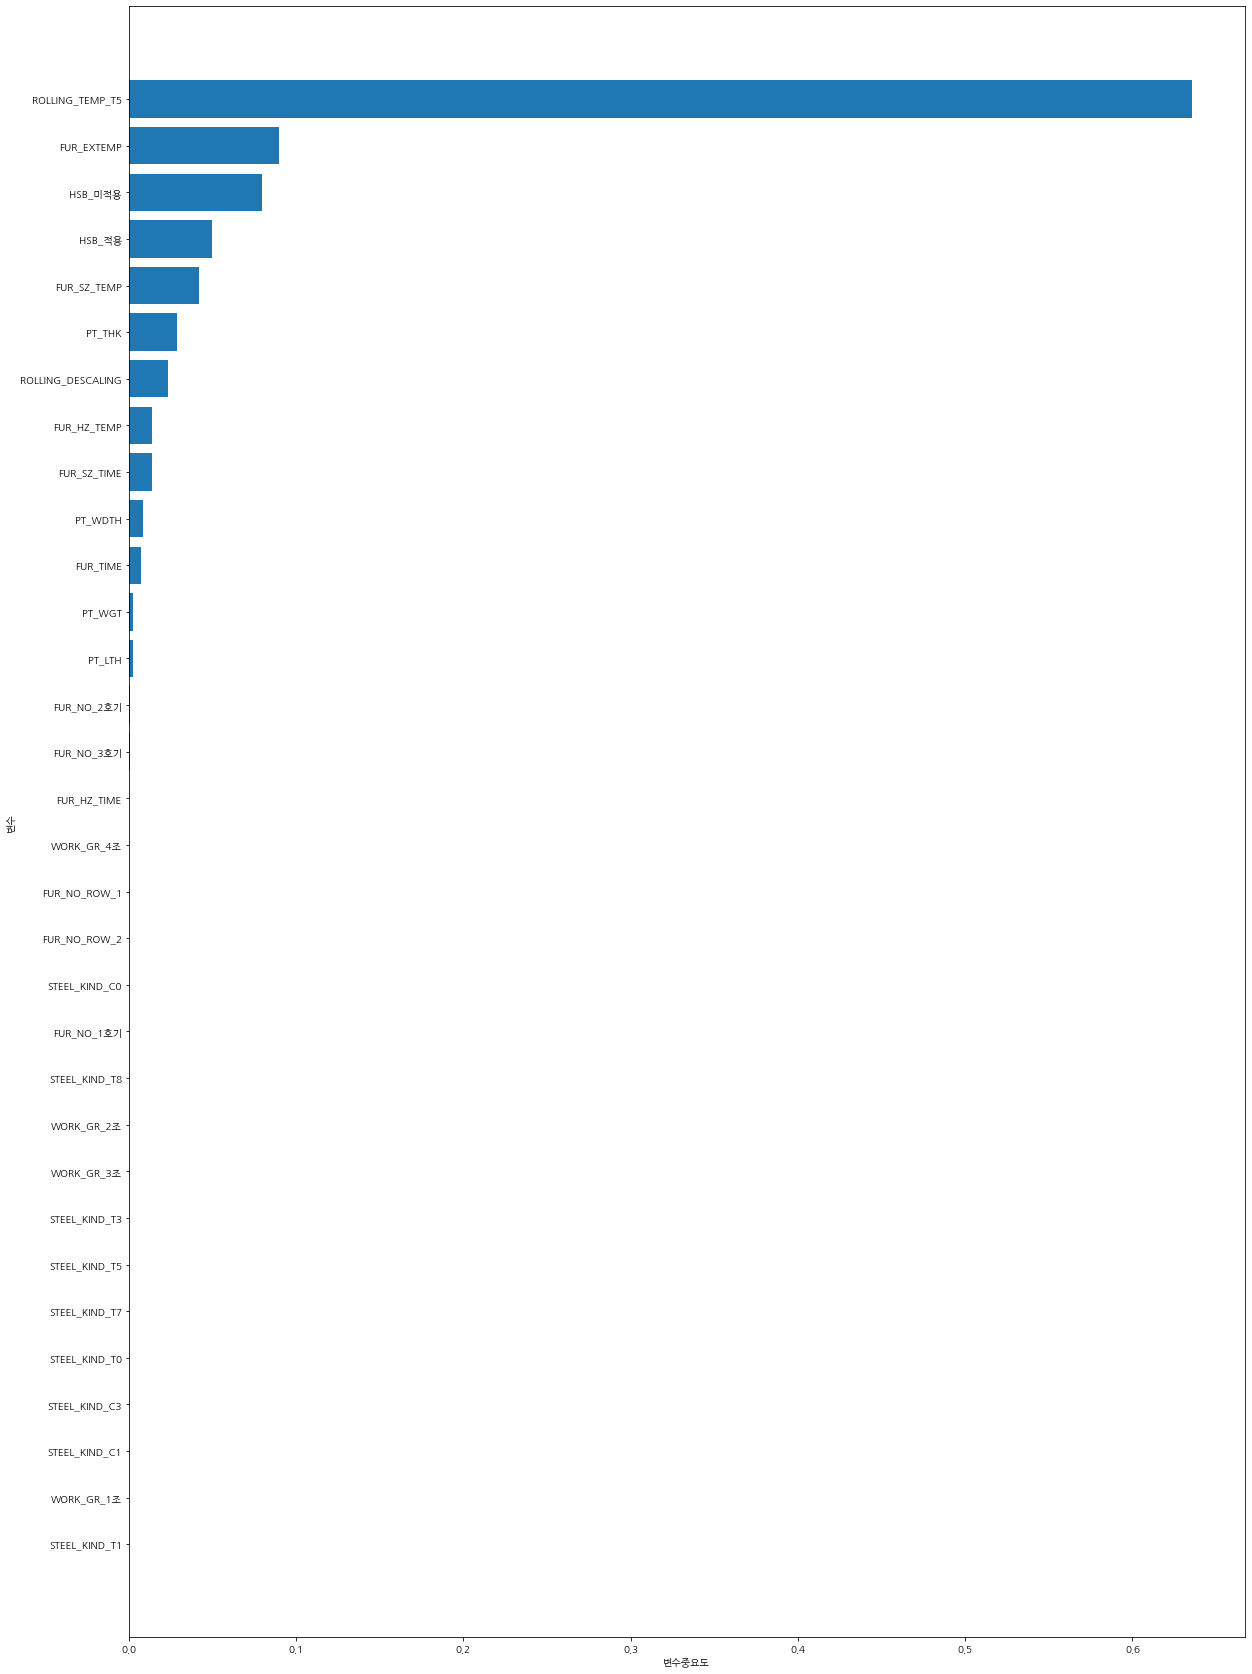

In [73]:
#설명변수 중요도그래프, 중요도가 높은 변수를 상위에 그림
df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_importance))
fig = plt.figure(figsize = (20, 30))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수중요도')
plt.ylabel('변수')

그레디언트 부스팅 기본모델로 VF를 파악해 본 결과
ROLLING_TEMP_T5, FUR_EXTEMP,  FUR_SZ_TEMP HSB_미적용 HSB_적용, PT_THK, ROLLING_DESCALING FUR_HZ_TEMP FUR_SZ_TIME PT_WDTH 순으로
중요 변수를 얻을 수 있었다



# VF 선정 결과
그래프를 통한 EDA이후 Decision Tree, Randomforest, Gradient Boosting logistic Regression 총 4가지 
모델에서 공통되거나 각 모델에서 모델생성시 영향력이 큰 변수 6개를 선택하면 다음과 같다. 

모델별 중요 변수로 선정된 설명변수를 나열해보면 아래와 같다.

Decision TREE(의사결정나무)
ROLLING_TEMP_5, FUR_EXTEMP, HSB_적용, ROLLING_DESCALING_9 ROLLING_DESCALING_7 

Logistic Regressor(로지스틱 회귀분석)
 ROLLING_TEMP_T5 PT_THK

Random Forest(랜덤포레스트
ROLLING_TEMP_T5	PT_WDTH FUR_SZ_TEMP	FUR_EXTEMP PT_THK FUR_HZ_TEMP  HSB_미적용	HSB_적용순

Gradient Boosting (그래디언트 부스팅)
ROLLING_TEMP_T5, ROLLING_DESCALING_9  FUR_SZ_TEMP HSB_미적용 HSB_적용 FUR_EXTEMP
ROLLING_DESCALING_7 ROLLING_DESCALING_5  FUR_TIME

# 위의 모델에서 공통적으로 나오거나 EDA하는 과정에서 중요변수로 생각됬던 변수들과 비교하여 중 총 7개의  최종 Vital few를 도출하였다.

 도출한 VF는 다음과 같다.
 ROLLING_TEMP_T5, ROLLING_DESCALING,  HSB,  FUR_EXTEMP, PT_WDTH,  PT_THK FUR_TIME 

# 도출된 VF로 데이터 전처리 

In [74]:
vf_nu_df_x1= df_raw[['SCALE','ROLLING_TEMP_T5','FUR_EXTEMP',
                     'PT_WDTH', 'PT_THK', 'FUR_TIME','HSB','ROLLING_DESCALING']]
vf_nu_df_x1=vf_nu_df_x1.astype({'SCALE' : 'int'})

In [75]:
df_raw_dummy_x = pd.get_dummies(vf_nu_df_x1)
df_raw_dummy_x.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 719
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SCALE              714 non-null    int64  
 1   ROLLING_TEMP_T5    714 non-null    int64  
 2   FUR_EXTEMP         714 non-null    int64  
 3   PT_WDTH            714 non-null    int64  
 4   PT_THK             714 non-null    float64
 5   FUR_TIME           714 non-null    int64  
 6   ROLLING_DESCALING  714 non-null    int64  
 7   HSB_미적용            714 non-null    uint8  
 8   HSB_적용             714 non-null    uint8  
dtypes: float64(1), int64(6), uint8(2)
memory usage: 46.0 KB


In [76]:
vf_nu_df_x =df_raw_dummy_x.drop('SCALE', axis =1 ,inplace =False)
vf_nu_df_y =df_raw_dummy_x['SCALE']
vf_nu_df_y= vf_nu_df_y.astype({'SCALE': 'int'})


In [77]:
vf_train_x , vf_test_x ,vf_train_y, vf_test_y = \
train_test_split(vf_nu_df_x, vf_nu_df_y, test_size = 0.3, random_state= 9981)
vf_train_x, vf_val_x , vf_train_y, vf_val_y = \
train_test_split(vf_train_x,vf_train_y, test_size=3/7, random_state=9981)
print('train data X size:{}'.format(vf_train_x.shape))
print('train data Y size:{}'.format(vf_train_y.shape))
print('test data X size:{}'.format(vf_test_x.shape))
print('test data Y size:{}'.format(vf_test_y.shape))
print('val data X size:{}'.format(vf_val_x.shape))
print('val data Y size:{}'.format(vf_val_y.shape))
# type(vf_train_x)


train data X size:(285, 8)
train data Y size:(285,)
test data X size:(215, 8)
test data Y size:(215,)
val data X size:(214, 8)
val data Y size:(214,)


In [78]:
vf_train_y

421    0
291    0
712    0
525    0
252    0
      ..
99     0
112    1
110    0
581    1
152    1
Name: SCALE, Length: 285, dtype: int64

In [90]:
# 최적의 분류를 위하여 모델의 하이터 파라미터를 조정해야하는데 입사귀수, 분리노드 최소 자료수를 순서대로 
#하이퍼 파라미터를 결정하겠다.

#모델 Parameter 조정 
#train 및 test 설명력 결과 저장
train_score = []; val_score = []
#min_samples_leaf: 잎사귀 최소 자료 수
para_leaf = [n_leaf*1 for n_leaf in range(1,21)]
for v_min_samples_leaf in para_leaf:
    dc = DecisionTreeClassifier(random_state = 9981, min_samples_leaf = v_min_samples_leaf) 
    dc.fit(vf_train_x, vf_train_y)
    train_score.append(dc.score(vf_train_x, vf_train_y))
    val_score.append(dc.score(vf_val_x,vf_val_y))#결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['ValidationScore'] = val_score#모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,ValidationScore
0,1,1.000,0.958
1,2,0.986,0.972
2,3,0.989,0.986
3,4,0.989,0.986
4,5,0.989,0.986
5,6,0.986,0.986
6,7,0.979,0.967
7,8,0.979,0.967
8,9,0.979,0.967
9,10,0.937,0.907


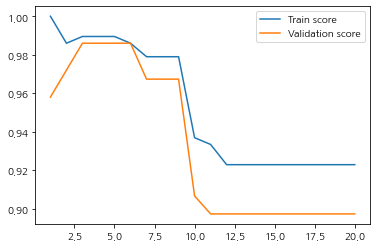

In [91]:
plt.plot(para_leaf,train_score, linestyle ="-", label ='Train score')
plt.plot(para_leaf, val_score, linestyle ="-", label ='Validation score')
plt.legend()
#  잎사귀 수 6일때, 트레인 발리데이션 acc가 동일 
# 잎사귀 수 6 결정

In [105]:
train_score = []; val_score = []
#min_samples_split: 분리 노드의 최소 자료 수
para_split = [n_split *2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    dc = DecisionTreeClassifier(random_state = 9981, min_samples_leaf = 6, min_samples_split = v_min_samples_split) 
    dc.fit(vf_train_x, vf_train_y)
   
    train_score.append(dc.score(vf_train_x, vf_train_y))
    val_score.append(dc.score(vf_val_x,vf_val_y))#결과 저장
df_score_split = pd.DataFrame()
df_score_split['MinSamplesLeaf'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['ValidationScore'] = val_score#모델 설명력 확인
df_score_split.round(3)


,MinSamplesLeaf,TrainScore,ValidationScore
0,4,0.986,0.986
1,6,0.986,0.986
2,8,0.986,0.986
3,10,0.986,0.986
4,12,0.986,0.986
5,14,0.986,0.986
6,16,0.986,0.986
7,18,0.986,0.986
8,20,0.986,0.986
9,22,0.986,0.986


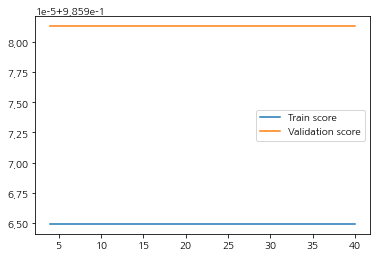

In [104]:
plt.plot(para_split,train_score, linestyle ="-", label ='Train score')
plt.plot(para_split, val_score, linestyle ="-", label ='Validation score')
plt.legend()
# 최소 자료노드 샘플 수는 결과에 영향이 없는 것으로 나와 디폴트 값을 지정하겠다.

In [103]:
train_score = []; val_score = []
#min_samples_split: 분리 노드의 최소 자료 수
para_ = [n_split *2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    dc = DecisionTreeClassifier(random_state = 9981, min_samples_leaf = 6, min_samples_split = v_min_samples_split) 
    dc.fit(vf_train_x, vf_train_y)
   
    train_score.append(dc.score(vf_train_x, vf_train_y))
    val_score.append(dc.score(vf_val_x,vf_val_y))#결과 저장
df_score_split = pd.DataFrame()
df_score_split['MinSamplesLeaf'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['ValidationScore'] = val_score#모델 설명력 확인
df_score_split.round(3)

,MinSamplesLeaf,TrainScore,ValidationScore
0,4,0.986,0.986
1,6,0.986,0.986
2,8,0.986,0.986
3,10,0.986,0.986
4,12,0.986,0.986
5,14,0.986,0.986
6,16,0.986,0.986
7,18,0.986,0.986
8,20,0.986,0.986
9,22,0.986,0.986


In [96]:
#max_depth: 최대 깊이 변경에 따른 모델 성능#train 및 val 설명력 결과 저장
train_score = []; val_score = []#max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1,11)]
for v_max_depth in para_depth:
    dc = DecisionTreeClassifier(random_state =9981, min_samples_leaf = 6 ,max_depth = v_max_depth) 
    dc.fit(vf_train_x, vf_train_y)
    train_score.append(dc.score(vf_train_x, vf_train_y))
    val_score.append(dc.score(vf_val_x,vf_val_y))#결과 저장
df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['ValidationScore'] = val_score
df_score_depth.round(3)

,Depth,TrainScore,ValidationScore
0,1,0.909,0.911
1,2,0.940,0.949
2,3,0.972,0.963
3,4,0.972,0.963
4,5,0.986,0.986
5,6,0.986,0.986
6,7,0.986,0.986
7,8,0.986,0.986
8,9,0.986,0.986
9,10,0.986,0.986


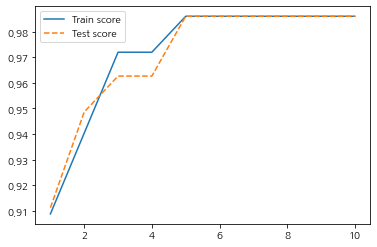

In [97]:
plt.plot(para_depth,train_score, linestyle ="-", label ='Train score')
plt.plot(para_depth,val_score, linestyle ="--", label ='Test score')
plt.legend()
#최대 깊이가 5일때 train set과 validation set이 0.986으로 동일한 acc를 보인다.

# 최종 모델 선정 
random_state=9981, min_samples_leaf=6, max_depth=5

In [98]:
dc_final =DecisionTreeClassifier(random_state=9981, min_samples_leaf=6, max_depth=5)
dc_final.fit(vf_train_x, vf_train_y)

#Train 데이터 설명력
print('Score on training set: {:.3f}'.format(dc_final.score(vf_train_x, vf_train_y)))

#Test 데이터 설명력
print('Score on test set: {:.3f}'.format(dc_final.score(vf_train_x, vf_train_y)))

#Val 데이터 설명력
print('Score on val set: {:.3f}'.format(dc_final.score(vf_val_x, vf_val_y)))
# 잎사귀수와 분리노드 최소자료수를 설정한 후 해당 수치로 최종 모델을 돌려 본결과 
# train , test, validation set 모두 다 98.6%넘는 정확도를 얻을 수 있었다.

Score on training set: 0.986
Score on test set: 0.986
Score on val set: 0.986


train set, test set, validation set 나누어진 세분류의 데이터에서 모두 0.986의 정확도를 보였다.

도출된 VF로 돌린 디시젼 트리의 그림을 보고 중요 변수 영향을 판단하고, 개선방법을 도출하겠다.

In [99]:
#해당 모델을 만드는 과정에 있어서 영향을 크게 준 변수들을 파악하기 위해 아래의 표를 그려보았다.

v_feature_name = vf_train_x.columns

df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = dc_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)
#worst concave points 변수가 모델 생성에 있어 가장 큰 영향을 준 변수로 측정되었고,

,Feature,Importance
0,ROLLING_TEMP_T5,0.661
1,FUR_EXTEMP,0.140
6,HSB_미적용,0.129
3,PT_THK,0.064
5,ROLLING_DESCALING,0.006
2,PT_WDTH,0.000
4,FUR_TIME,0.000
7,HSB_적용,0.000


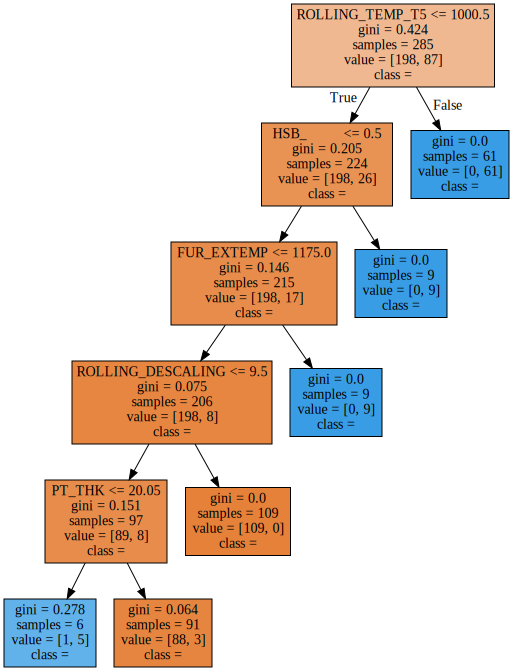

In [115]:
#그림을 특성을 나누어 보았다. 위에 말한대로 AGE CEMENT WATER 등으로 가지가 나누어졌다.
tree_final = DecisionTreeClassifier(random_state=9981, min_samples_leaf=6, max_depth=5)
tree_final.fit(vf_train_x, vf_train_y)
export_graphviz(tree_final, out_file = 'tree_depth.dot', class_names= ["양품","불량"], feature_names = v_feature_name, impurity = True, filled =True)
with open('tree_depth.dot')as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


In [101]:
y_pred = tree_final.predict(vf_test_x)
print('Accuracy: {0:3f}\n'.format(tree_final.score(vf_test_x, vf_test_y)))
print('Confusion matrix : \n{}'.format(confusion_matrix(vf_test_y, y_pred)))

Accuracy: 0.972093

Confusion matrix : 
[[136   0]
 [  6  73]]


최종 모델 생성을 통해 디시젼 트리의 그림을 그려본 결과 위와 같은 결과를 얻을 수 있다.
따라서 우리가 스케일 불량율을 줄이기 위해서는 다음과 같은 변수를 제어한다.

ROLLING_TEMP_T5(압연온도)를  <= 1000.5도 이하로 제어한다.
ROLLING_DESCALING(디스케일링 횟수) <= 9.5이하로 한다.
FUR_EXTEMP(추출 온도) <= 1175.0도 이하로 한다.
HSB 미적용 <- 데이터 상으로는 적용해야 불량이 줄어 들 것 같은 생각이 들었는데 모델링 과정에서 문제가 생긴 것 같다.
PT_THK(플레이트 두께) <= 해당 변수는 생산지시두께로 우리가 변환 할 수 없다.


In [108]:
import pydot(graph) = pydot.graph_from_dot_file('tree_low.dot',encoding='utf8')
graph.write_png('decisionTree.png')

SyntaxError: invalid syntax (<ipython-input-108-3ef3187c80ff>, line 1)